# INFERTILITY PREDICTION USING LIFESTYLE & PCOS MEDICAL DATA FROM KERALA HOSPITALS USING MACHINE LEARNING

DOMAIN:- HEALTHCARE DATASET

DATA COLLECTION:- This Real time dataset is collected across 10 different hospitals in Kerala,India

# PROBLEM STATEMENT:-
Infertility is a growing health concern among the women globally, it’s often influenced by lifestyle, hormonal imbalance, and underlying medical conditions like PCOS.
Early detection and intervention can improve treatment outcomes.
This project aims to build a predictive model to identify the likelihood of infertility-related risks using patient lifestyle and clinical features.



#OBJECTIVE: -
To analyze and predictive infertility risk using supervised machine learning algorithms based on patient demography lifestyle, and clinical data.
This model will support early detection of PCOS and other infertility markers through the data-driven insights.



# BRAINSTORM:-
1. PCOS dataset is chosen from Kaggle.
2. Perform Exploratory Data Analysis (EDA) on the clinical dataset.
3. Handle missing values, duplicates, and outliers.
4. Encode categorical features and scale numerical data.
5. Apply classification algorithms like
* 	Logistic Regression (baseline model)
*	Decision Tree
*	Random Forest
*	XGBoost (best for structured data)
*	SVM (Support Vector Machine)
6. Evaluate models using
*	Accuracy
*	Precision, Recall
*	F1-score
*	ROC-AUC
*	Confusion Matrix
7. Interpret results and visualize influential predictors.




DESCRIPTION:-
This dataset consists of medical records and lifestyle features of women, including hormone levels, BMI, Cycle regularity, No.of abortions, and insulin resistance markers. Infertility prediction and PCOS diagnosis were the initial uses of the data.With more than 500 entries, it has both classified an numerical elements.


TARGET:-
PCOS(Y/N)- Indicates the presence of Polycystic Ovary Syndrome, a common cause for infertility.


In [ ]:
#importing necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Uploading the dataset
url='https://raw.githubusercontent.com/Tahira77/Infertility-prediction-using-Machine-Learning/refs/heads/main/INFERTILITY%20DATASET(PCOS).csv'
infertility_df=pd.read_csv(url)
infertility_df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28,44.6,152.000,19.30,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.50,NaN
1,2.0,2.0,0.0,36,65.0,161.500,24.92,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.70,NaN
2,3.0,3.0,1.0,33,68.8,165.000,25.27,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.00,NaN
3,4.0,4.0,0.0,37,65.0,148.000,29.67,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.50,NaN
4,5.0,5.0,0.0,25,52.0,161.000,20.06,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,537.0,537.0,0.0,35,50.0,164.592,18.46,17.0,72.0,16.0,...,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.70,NaN
542,538.0,538.0,0.0,30,63.2,158.000,25.32,15.0,72.0,18.0,...,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.20,NaN
543,539.0,539.0,0.0,36,54.0,152.000,23.37,13.0,74.0,20.0,...,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.30,NaN
544,540.0,540.0,0.0,27,50.0,150.000,22.22,15.0,74.0,20.0,...,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.50,NaN


In [ ]:
infertility_df.shape

(546, 45)

In [ ]:
#Retrieving top 10 data
infertility_df.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28,44.6,152.0,19.30,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.50,NaN
1,2.0,2.0,0.0,36,65.0,161.5,24.92,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.70,NaN
2,3.0,3.0,1.0,33,68.8,165.0,25.27,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.00,NaN
3,4.0,4.0,0.0,37,65.0,148.0,29.67,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.50,NaN
4,5.0,5.0,0.0,25,52.0,161.0,20.06,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.00,NaN
5,6.0,6.0,0.0,NAN,74.1,165.0,27.22,15.0,78.0,28.0,...,0.0,0.0,110.0,70.0,9.0,6.0,16.0,20.0,8.00,NaN
6,7.0,7.0,0.0,34,64.0,156.0,26.30,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,6.0,6.0,15.0,16.0,6.80,NaN
7,8.0,8.0,0.0,33,58.5,159.0,23.14,13.0,72.0,20.0,...,0.0,0.0,120.0,80.0,7.0,6.0,15.0,18.0,7.10,NaN
8,9.0,9.0,0.0,32,NaN,158.0,0.00,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,5.0,7.0,17.0,17.0,4.20,NaN
9,10.0,10.0,0.0,36,52.0,150.0,Nan,15.0,80.0,20.0,...,0.0,0.0,110.0,80.0,1.0,1.0,14.0,17.0,2.50,NaN



*	This dataset contains all physical and clinical parameters to determine PCOS and infertility related issues. There are a total of 44 parameters.

*	The unit used is feet to cm

*	Blood pressure entered as systolic and diastolic separately

*	RBS means Random glucose test

*	Beta-HCG cases are mentioned as Case I and II

*	Blood Group indications:

1. 	A+ = 11
2. 	A- = 12
3. 	B+ = 13
4. 	B- = 14
5.	O+ =15
6. O- = 16
7. 	AB+ =17
8. 	AB- = 18




# Performing Initial Exploratory Data Analysis(EDA)

In [ ]:
#Dataset Information
infertility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  545 non-null    float64
 1   Patient File No.        545 non-null    float64
 2   PCOS (Y/N)              545 non-null    float64
 3    Age (yrs)              542 non-null    object 
 4   Weight (Kg)             544 non-null    float64
 5   Height(Cm)              545 non-null    float64
 6   BMI                     542 non-null    object 
 7   Blood Group             545 non-null    float64
 8   Pulse rate(bpm)         545 non-null    float64
 9   RR (breaths/min)        545 non-null    float64
 10  Hb(g/dl)                545 non-null    float64
 11  Cycle(R/I)              545 non-null    float64
 12  Cycle length(days)      545 non-null    float64
 13  Marriage Status (Yrs)   538 non-null    object 
 14  Pregnant(Y/N)           545 non-null    fl

In [ ]:
#Checking for any missing values
infertility_df.isnull().sum()

,0
Sl. No,1
Patient File No.,1
PCOS (Y/N),1
Age (yrs),4
Weight (Kg),2
Height(Cm),1
BMI,4
Blood Group,1
Pulse rate(bpm),1
RR (breaths/min),1


* This dataset contains some missing values and some NAN values.


In [ ]:
#Summary statistics
infertility_df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm)
count,545.000000,545.000000,545.000000,544.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,...,545.000000,545.000000,544.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,270.372477,270.372477,0.326606,59.653493,156.481277,13.807339,73.234862,19.234862,11.158312,2.563303,...,0.453211,0.488073,0.516544,0.245872,114.664220,76.950459,6.130275,6.634862,15.023486,15.455725
std,156.626414,156.626414,0.469402,10.988093,6.033745,1.844492,4.417116,1.685763,0.865377,0.903492,...,0.498263,0.500317,0.500186,0.430998,7.369895,5.559779,4.227395,4.444994,3.558063,3.321930
min,1.000000,1.000000,0.000000,31.000000,137.000000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,135.000000,135.000000,0.000000,52.000000,152.000000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000
50%,271.000000,271.000000,0.000000,59.000000,156.000000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000
75%,405.000000,405.000000,1.000000,65.000000,160.000000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000
max,541.000000,541.000000,1.000000,108.000000,180.000000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000


In [ ]:
#fertility
infertility_df.shape

(546, 45)

* This dataset is in 2Dimension.

* Selected 'PCOS' as the Target.






In [ ]:
#Fertility Status Counts
display(infertility_df['PCOS (Y/N)'].value_counts())

,count
PCOS (Y/N),
0.0,367
1.0,178


In [ ]:
original_df = infertility_df.copy()

PCOS value=1 indicates PCOS, and PCOS value=0 indicates no PCOS

The women having PCOS Indicates the presence of Polycystic Ovary Syndrome, a common cause for infertility.

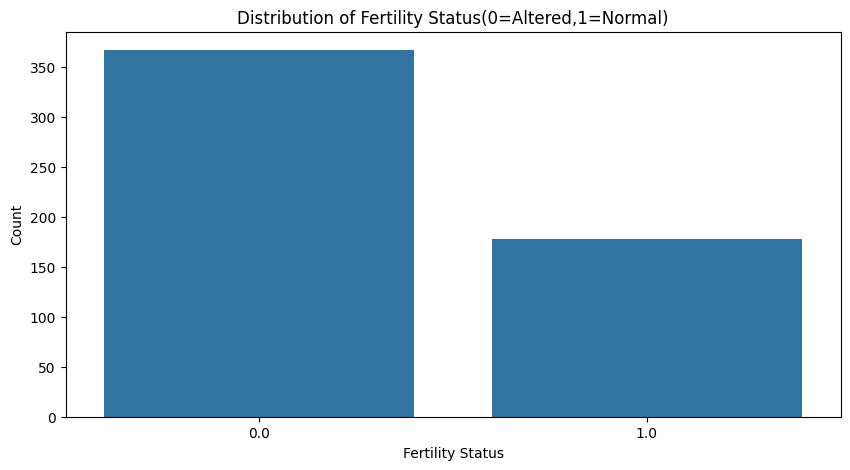

In [ ]:
#Plot Distribution of Target Variable
plt.figure(figsize=(10,5))
sns.countplot(x='PCOS (Y/N)',data=infertility_df)
plt.title('Distribution of Fertility Status(0=Altered,1=Normal)')
plt.xlabel('Fertility Status')
plt.ylabel('Count')
plt.show()

In [ ]:
print(infertility_df.columns.tolist())

['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marriage Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Unnamed: 44']


In [ ]:
# Clean column names: strip leading/trailing spaces and reduce multiple internal spaces to a single space
infertility_df.columns = infertility_df.columns.str.strip().str.replace(' +', ' ', regex=True)


Text(0.5, 1.0, 'Age Distribution')

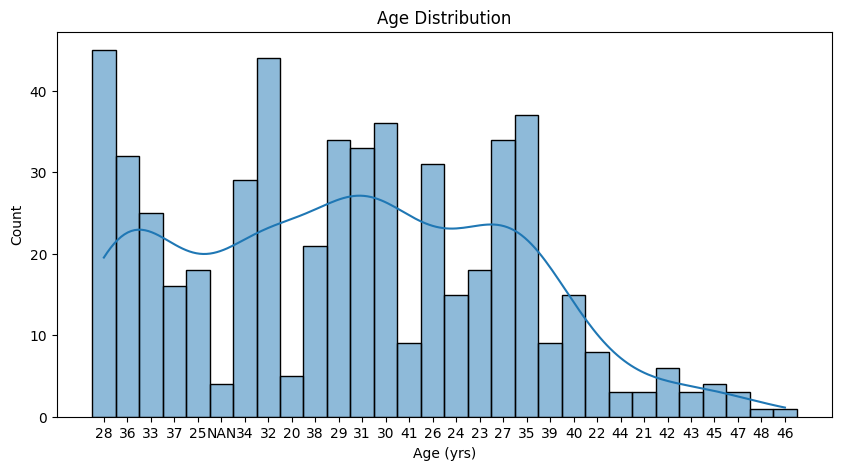

In [ ]:
# Distribution of age
plt.figure(figsize=(10,5))
sns.histplot(infertility_df['Age (yrs)'], kde=True)
plt.title("Age Distribution")


Text(0.5, 1.0, 'Missing Value Heatmap')

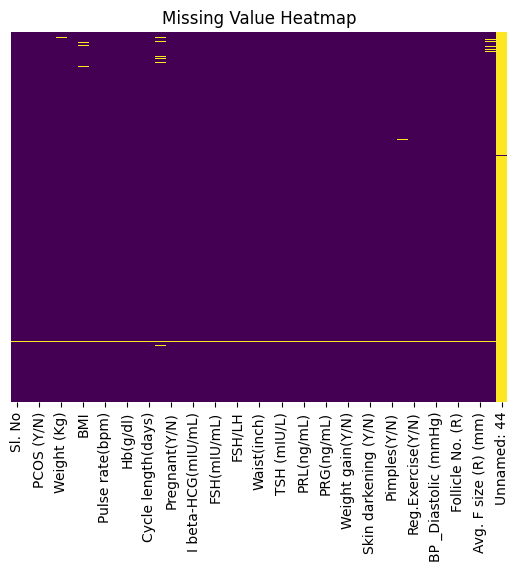

In [ ]:
# Heatmap of missing values
sns.heatmap(infertility_df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Value Heatmap")

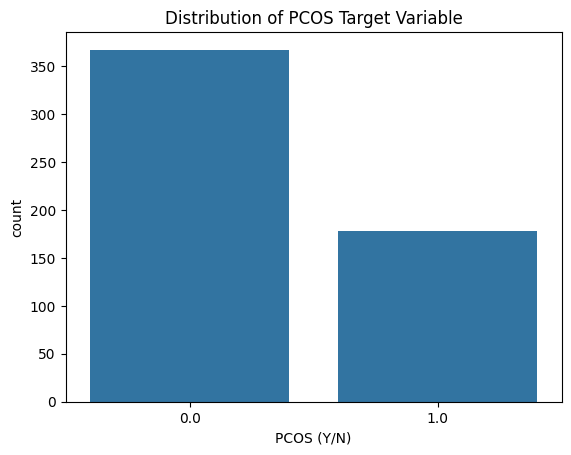

In [ ]:
sns.countplot(x='PCOS (Y/N)', data=infertility_df)
plt.title("Distribution of PCOS Target Variable")
plt.show()

In [ ]:
print(infertility_df.dtypes)

Sl. No                   float64
Patient File No.         float64
PCOS (Y/N)               float64
Age (yrs)                 object
Weight (Kg)              float64
Height(Cm)               float64
BMI                       object
Blood Group              float64
Pulse rate(bpm)          float64
RR (breaths/min)         float64
Hb(g/dl)                 float64
Cycle(R/I)               float64
Cycle length(days)       float64
Marriage Status (Yrs)     object
Pregnant(Y/N)            float64
No. of abortions         float64
I beta-HCG(mIU/mL)       float64
II beta-HCG(mIU/mL)       object
FSH(mIU/mL)              float64
LH(mIU/mL)               float64
FSH/LH                   float64
Hip(inch)                float64
Waist(inch)              float64
Waist:Hip Ratio          float64
TSH (mIU/L)              float64
AMH(ng/mL)                object
PRL(ng/mL)               float64
Vit D3 (ng/mL)           float64
PRG(ng/mL)               float64
RBS(mg/dl)               float64
Weight gai

In [ ]:
# Converting object dtpyes columns to numeric
cols_to_convert = ['Cycle(R/I)','Age (yrs)', 'BMI', 'Marriage Status (Yrs)',
                   'II beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'Endometrium (mm)']

for col in cols_to_convert:
    infertility_df[col] = pd.to_numeric(infertility_df[col], errors='coerce')

In [ ]:
# Drop the unnamed column if it's not useful
infertility_df = infertility_df.drop(columns=['Unnamed: 44'], errors='ignore')

In [ ]:
infertility_df.shape

(546, 44)

In [ ]:
infertility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 545 non-null    float64
 1   Patient File No.       545 non-null    float64
 2   PCOS (Y/N)             545 non-null    float64
 3   Age (yrs)              538 non-null    float64
 4   Weight (Kg)            544 non-null    float64
 5   Height(Cm)             545 non-null    float64
 6   BMI                    536 non-null    float64
 7   Blood Group            545 non-null    float64
 8   Pulse rate(bpm)        545 non-null    float64
 9   RR (breaths/min)       545 non-null    float64
 10  Hb(g/dl)               545 non-null    float64
 11  Cycle(R/I)             545 non-null    float64
 12  Cycle length(days)     545 non-null    float64
 13  Marriage Status (Yrs)  537 non-null    float64
 14  Pregnant(Y/N)          545 non-null    float64
 15  No. of

In [ ]:
infertility_df['PCOS (Y/N)']

,PCOS (Y/N)
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
541,0.0
542,0.0
543,0.0
544,0.0


In [ ]:
infertility_df.isnull().sum()

,0
Sl. No,1
Patient File No.,1
PCOS (Y/N),1
Age (yrs),8
Weight (Kg),2
Height(Cm),1
BMI,10
Blood Group,1
Pulse rate(bpm),1
RR (breaths/min),1


Dropped the 'Unnamed' column from the dataset for better clarity.

# EDA and Pre-processing

In [ ]:
#Handling Missing Values

#Checking for any missing values
infertility_df.isnull().sum()

,0
Sl. No,1
Patient File No.,1
PCOS (Y/N),1
Age (yrs),8
Weight (Kg),2
Height(Cm),1
BMI,10
Blood Group,1
Pulse rate(bpm),1
RR (breaths/min),1


In [ ]:
numeric_cols = ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Pulse rate(bpm)', 'RR (breaths/min)',
                'Hb(g/dl)', 'Cycle length(days)', 'Marriage Status (Yrs)', 'No. of abortions',
                'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)',
                'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
                'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
                'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
                'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']

In [ ]:
infertility_df[numeric_cols] = infertility_df[numeric_cols].astype(float)

In [ ]:
#use median function for handling missing values in numeric columns
for col in numeric_cols:
  infertility_df[col]=infertility_df[col].fillna(infertility_df[col].median())

In [ ]:
# use mode function for handling missing values in Categorical columns
infertility_df['Blood Group'] = infertility_df['Blood Group'].fillna(infertility_df['Blood Group'].mode()[0])
infertility_df['Cycle(R/I)'] = infertility_df['Cycle(R/I)'].fillna(infertility_df['Cycle(R/I)'].mode()[0])
infertility_df['Pregnant(Y/N)'] = infertility_df['Pregnant(Y/N)'].fillna(infertility_df['Pregnant(Y/N)'].mode()[0])
infertility_df['Weight gain(Y/N)'] = infertility_df['Weight gain(Y/N)'].fillna(infertility_df['Weight gain(Y/N)'].mode()[0])
infertility_df['hair growth(Y/N)'] = infertility_df['hair growth(Y/N)'].fillna(infertility_df['hair growth(Y/N)'].mode()[0])
infertility_df['Skin darkening (Y/N)'] = infertility_df['Skin darkening (Y/N)'].fillna(infertility_df['Skin darkening (Y/N)'].mode()[0])
infertility_df['Hair loss(Y/N)'] = infertility_df['Hair loss(Y/N)'].fillna(infertility_df['Hair loss(Y/N)'].mode()[0])
infertility_df['Pimples(Y/N)'] = infertility_df['Pimples(Y/N)'].fillna(infertility_df['Pimples(Y/N)'].mode()[0])
infertility_df['Fast food (Y/N)'] = infertility_df['Fast food (Y/N)'].fillna(infertility_df['Fast food (Y/N)'].mode()[0])
infertility_df['Reg.Exercise(Y/N)'] = infertility_df['Reg.Exercise(Y/N)'].fillna(infertility_df['Reg.Exercise(Y/N)'].mode()[0])

In [ ]:
#drop unnecessary columns
infertility_df.drop(columns=['Sl. No','Patient File No.'],inplace=True)

Interpretation:-

* Numeric fields are filled with the median to handle skewness and outliers effectively.

* Categorical fields are filled with the mode as they are mostly binary or nominal.




In [ ]:
#Handling duplicates
print("Duplicates:", infertility_df.duplicated().sum())
infertility_df.drop_duplicates(inplace=True)


Duplicates: 4


In [ ]:
print("Duplicates:", infertility_df.duplicated().sum())

Duplicates: 0


Handling Outliers

In [ ]:
infertility_df.shape

(542, 42)

In [ ]:
infertility_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 545
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    float64
 1   Age (yrs)              542 non-null    float64
 2   Weight (Kg)            542 non-null    float64
 3   Height(Cm)             542 non-null    float64
 4   BMI                    542 non-null    float64
 5   Blood Group            542 non-null    float64
 6   Pulse rate(bpm)        542 non-null    float64
 7   RR (breaths/min)       542 non-null    float64
 8   Hb(g/dl)               542 non-null    float64
 9   Cycle(R/I)             542 non-null    float64
 10  Cycle length(days)     542 non-null    float64
 11  Marriage Status (Yrs)  542 non-null    float64
 12  Pregnant(Y/N)          542 non-null    float64
 13  No. of abortions       542 non-null    float64
 14  I beta-HCG(mIU/mL)     542 non-null    float64
 15  II beta-HCG

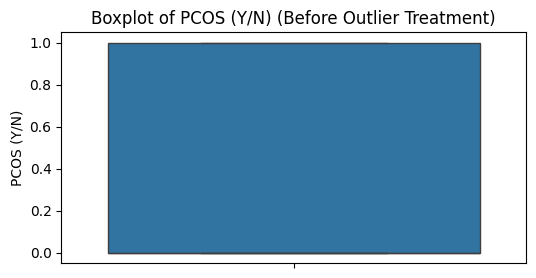

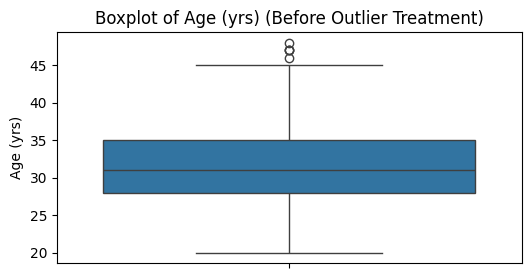

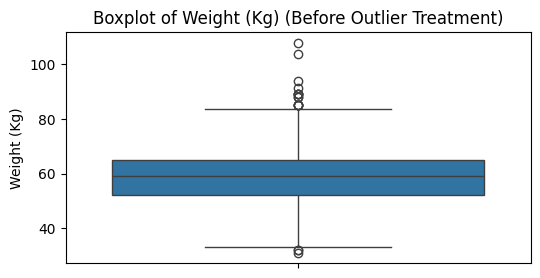

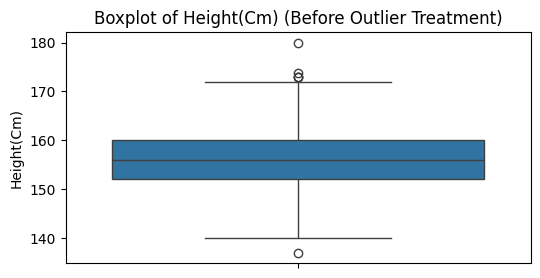

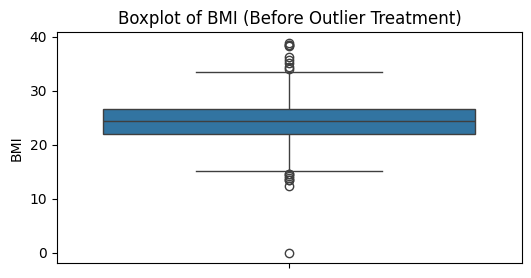

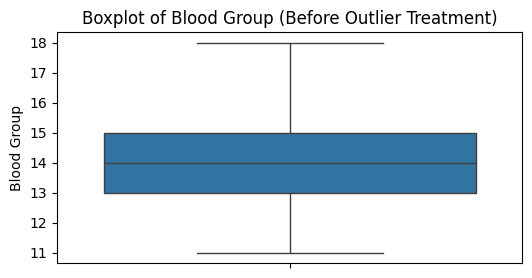

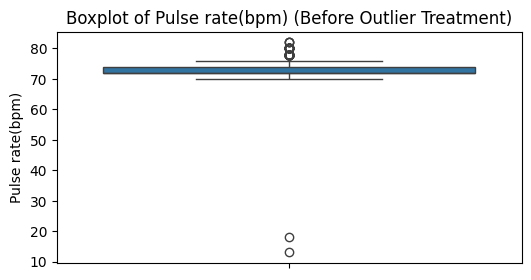

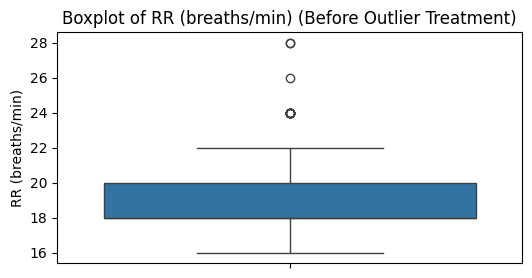

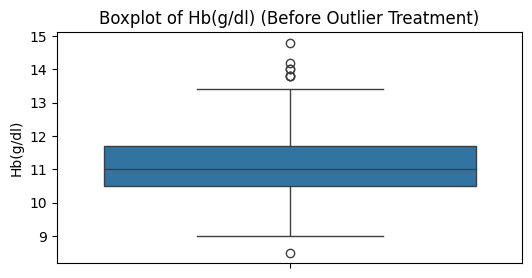

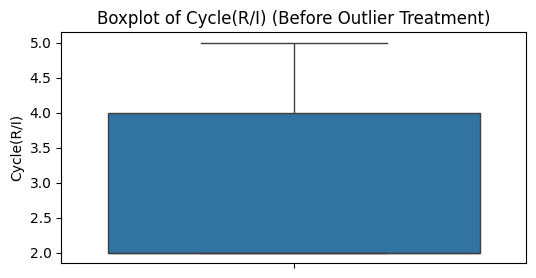

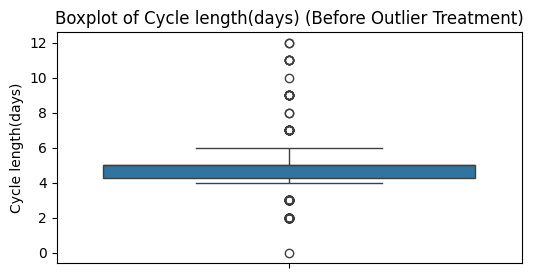

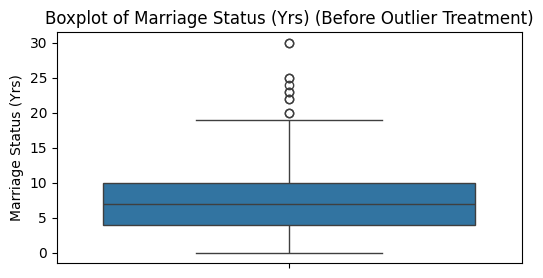

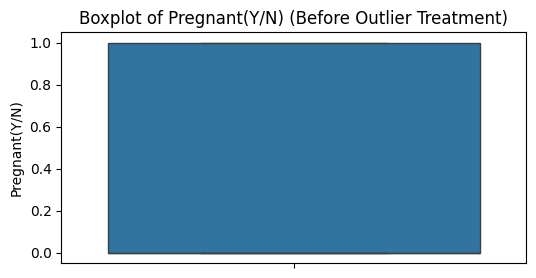

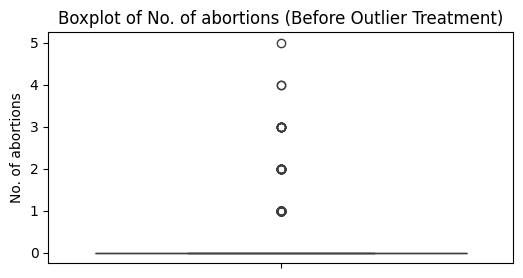

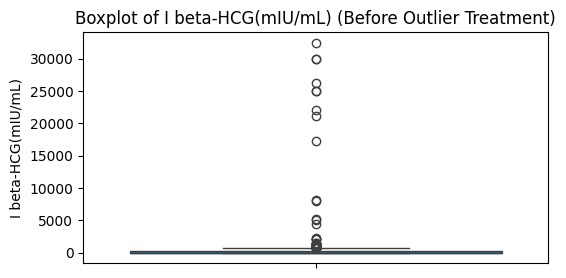

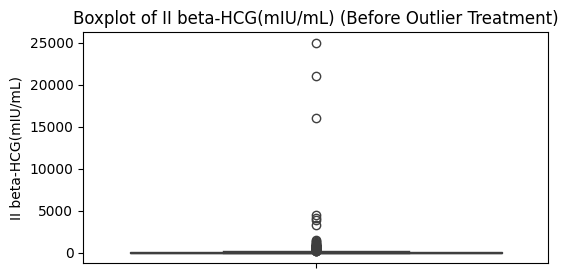

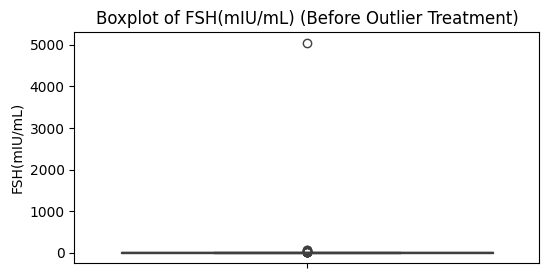

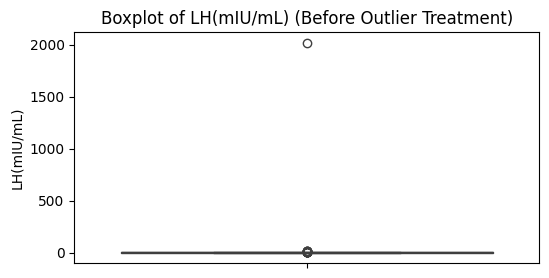

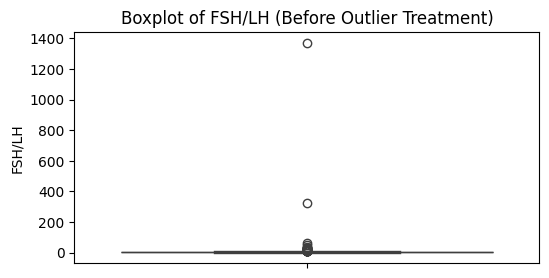

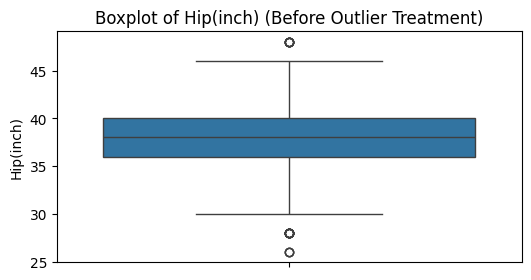

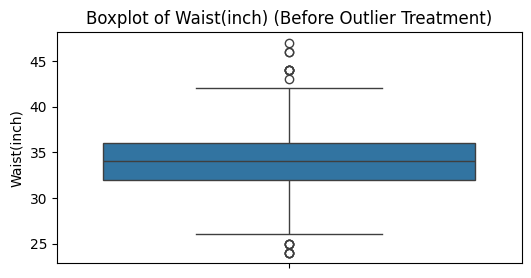

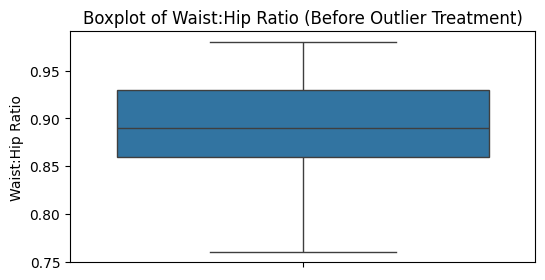

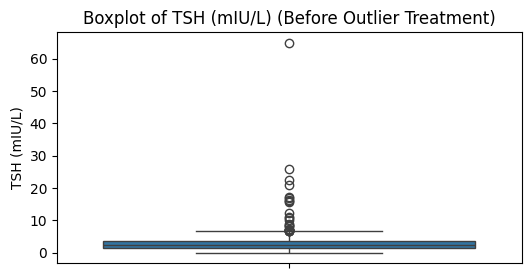

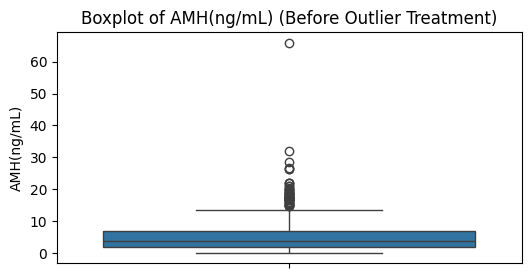

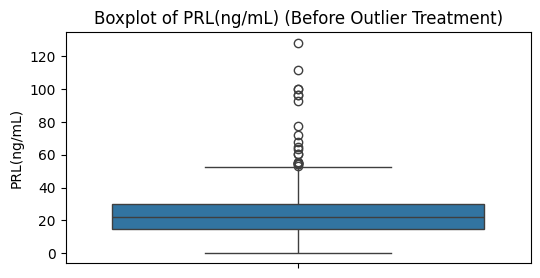

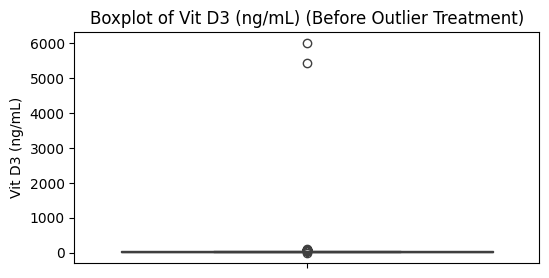

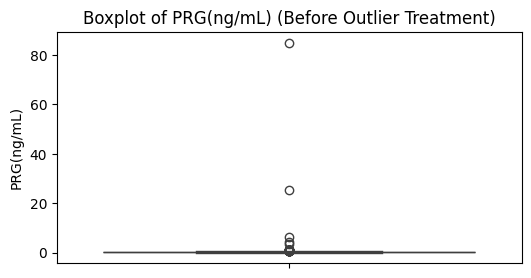

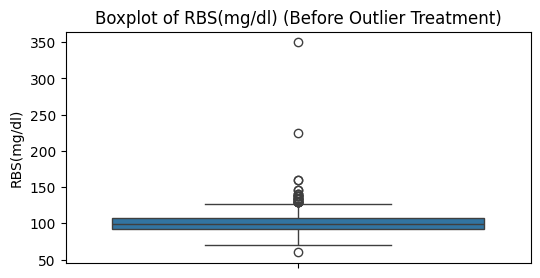

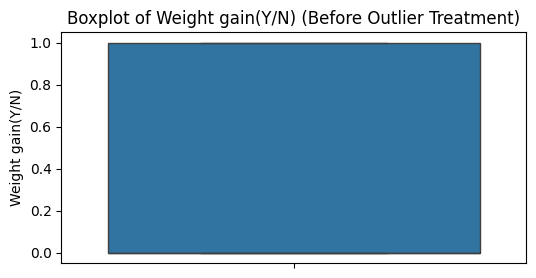

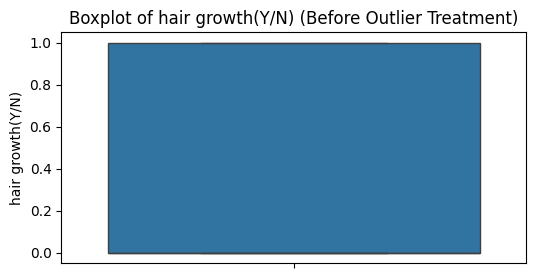

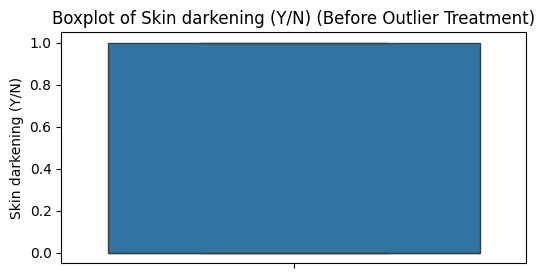

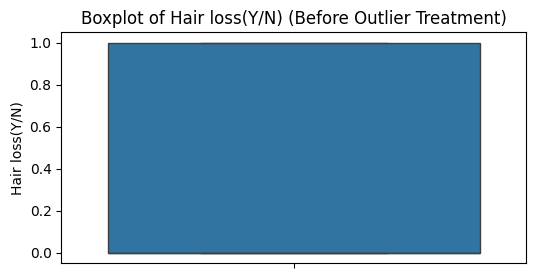

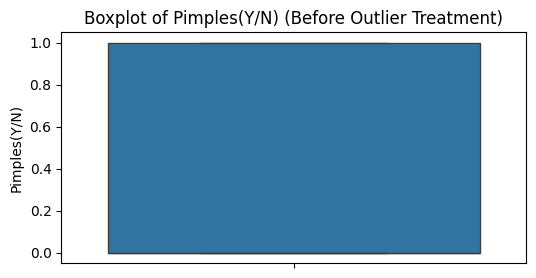

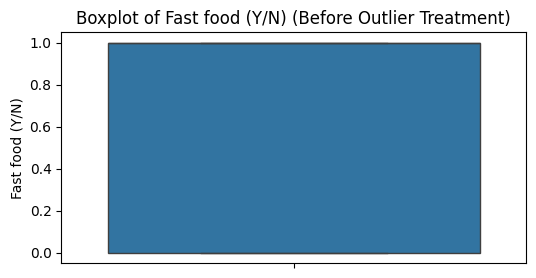

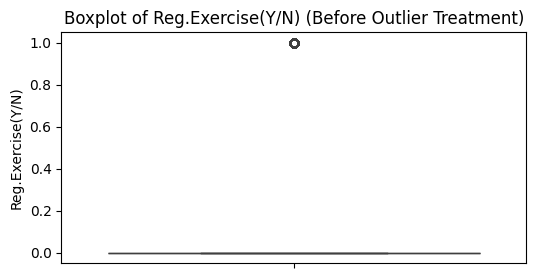

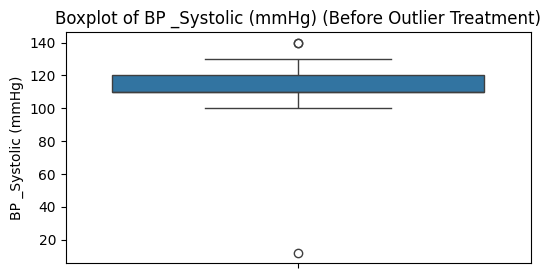

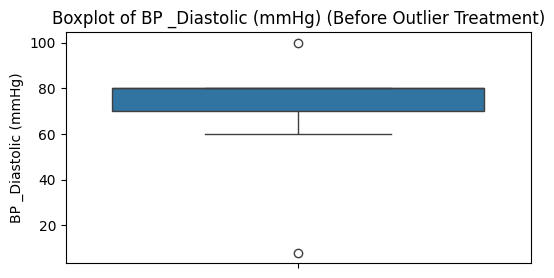

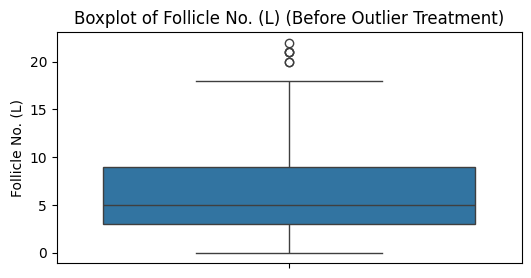

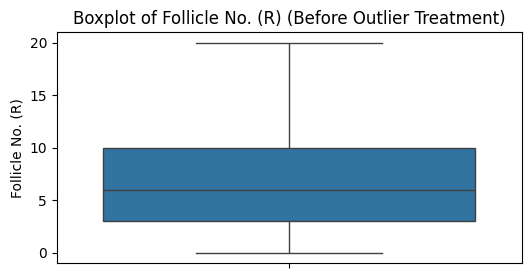

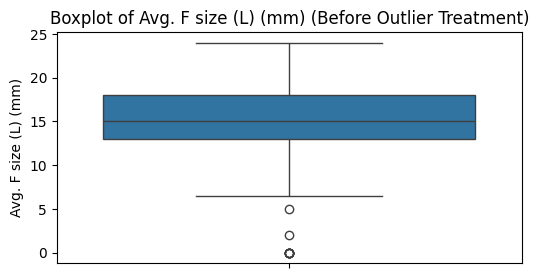

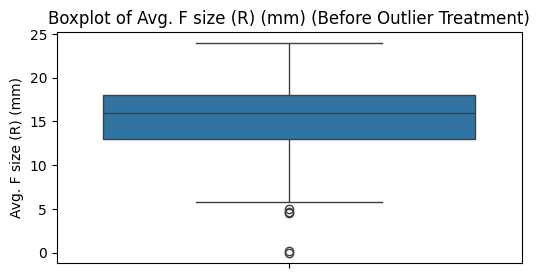

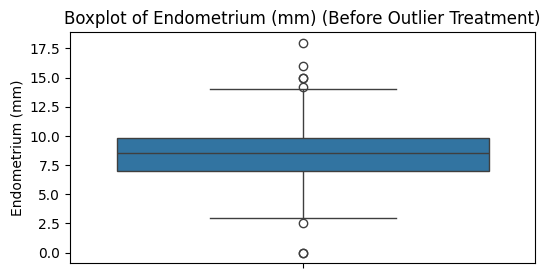

In [ ]:
for col in infertility_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(infertility_df[col])
    plt.title(f"Boxplot of {col} (Before Outlier Treatment)")
    plt.show()

In [ ]:
from scipy.stats import zscore
import numpy as np

# Select only numeric columns
numeric_cols = infertility_df.select_dtypes(include=['number']).columns

# Ensure numeric, convert if needed
infertility_df[numeric_cols] = infertility_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaNs or fill them before z-score calc
clean_numeric_df = infertility_df[numeric_cols].dropna()

z_scores = np.abs(zscore(clean_numeric_df))


In [ ]:
infertility_df.shape

(542, 42)

In [ ]:
# Assuming df is your original dataframe
numeric_cols = infertility_df.select_dtypes(include='number')
z_scores = zscore(numeric_cols)
abs_z_scores = abs(z_scores)

# Outlier threshold
threshold = 3

# Check which columns have values above the threshold
outlier_columns = (abs_z_scores > threshold).any(axis=0)
columns_with_outliers = numeric_cols.columns[outlier_columns].tolist()

print("Columns with outliers:", columns_with_outliers)


Columns with outliers: ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)', 'Marriage Status (Yrs)', 'No. of abortions', 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


In [ ]:
numeric_df = infertility_df.select_dtypes(include=['number'])

z_scores = zscore(numeric_df)
abs_z_scores = abs(z_scores)

# Replace outliers (Z-score > 3) with median of the column
for i, col in enumerate(numeric_df.columns):
    infertility_df.loc[abs_z_scores[:, i] > 3, col] = infertility_df[col].median()

In [ ]:
infertility_df.shape

(542, 42)

In [ ]:
# Recompute Z-scores after replacement
numeric_df = infertility_df.select_dtypes(include=['number'])
z_scores_after = zscore(numeric_df)

# Check how many values still have Z-score > 3
import numpy as np
print("Remaining outliers (Z > 3):", np.sum(np.abs(z_scores_after) > 3))

Remaining outliers (Z > 3): 132


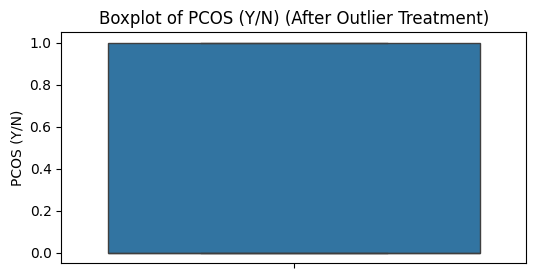

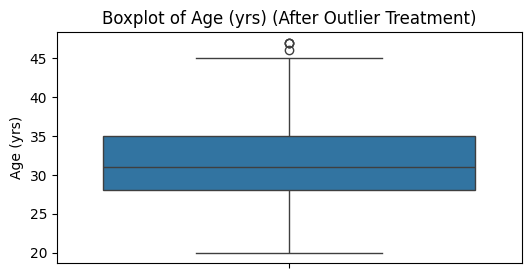

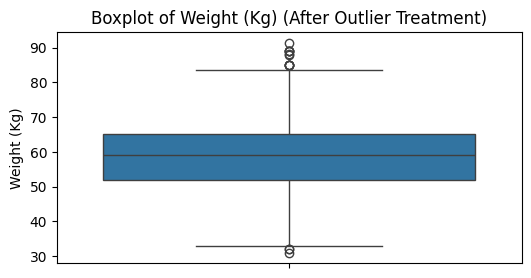

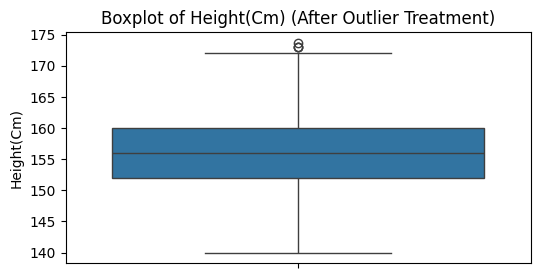

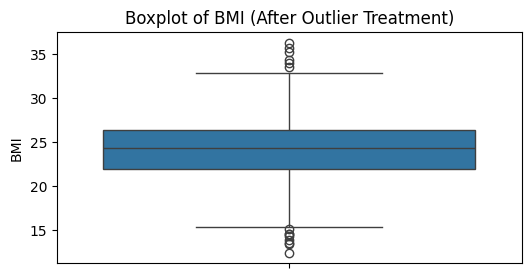

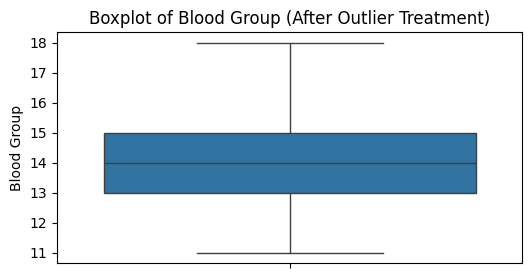

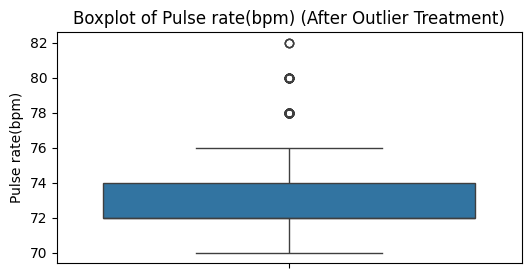

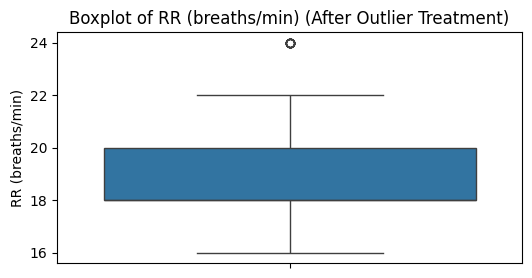

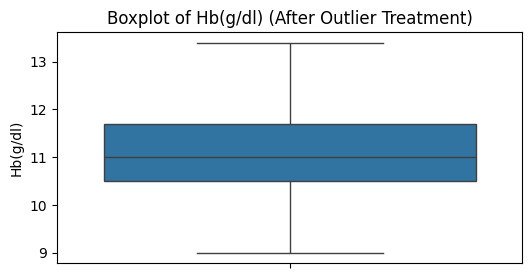

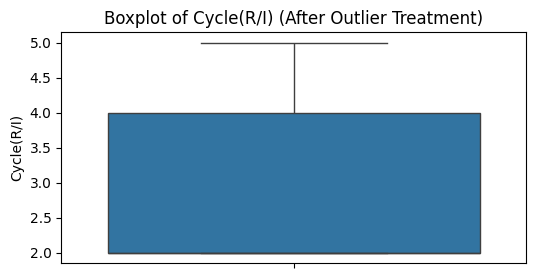

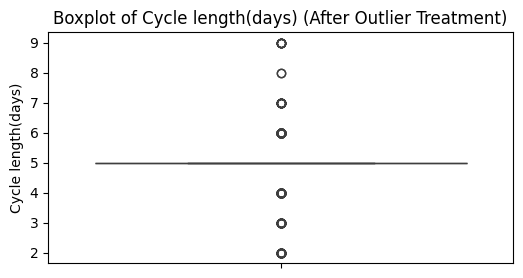

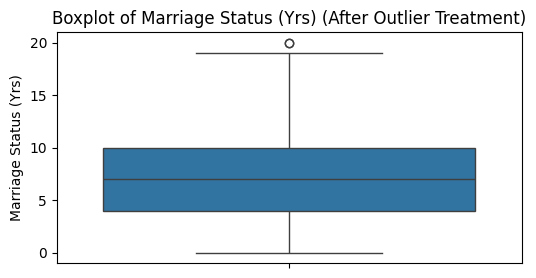

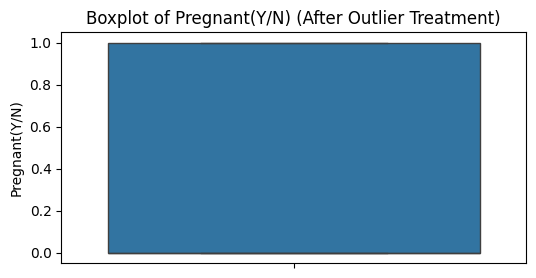

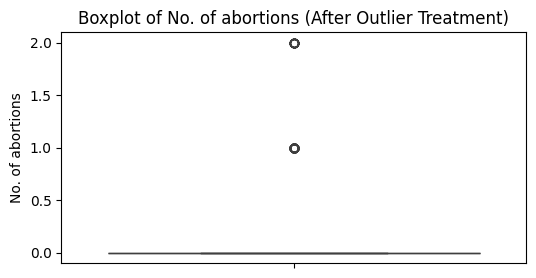

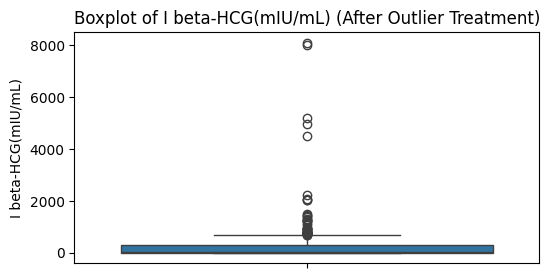

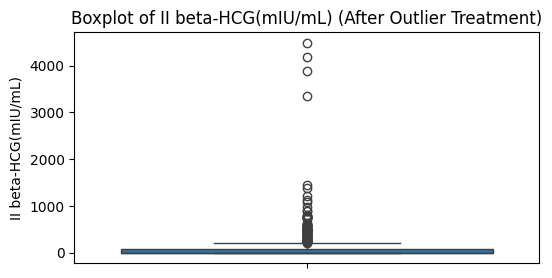

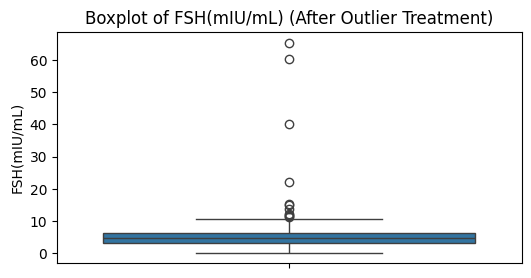

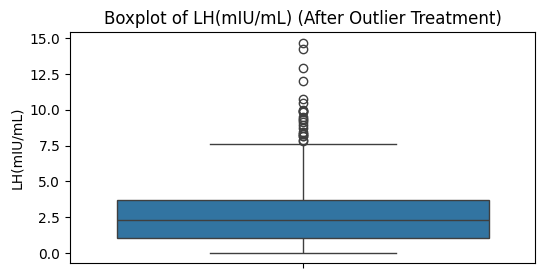

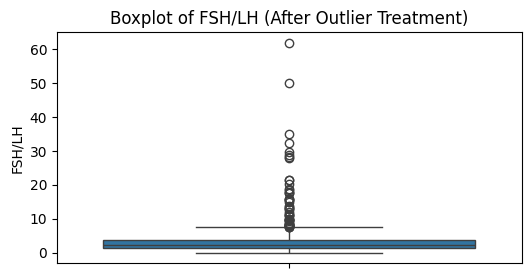

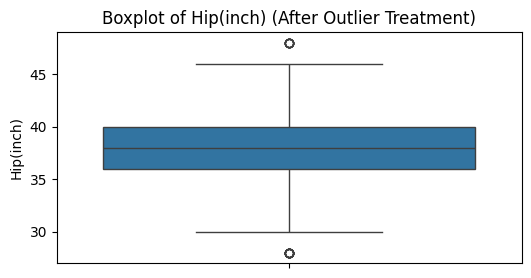

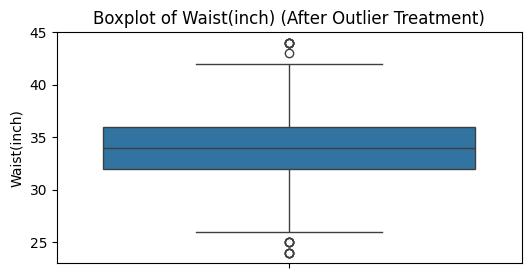

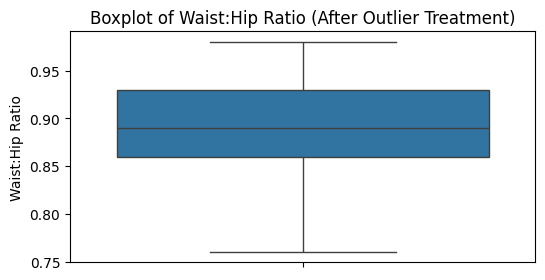

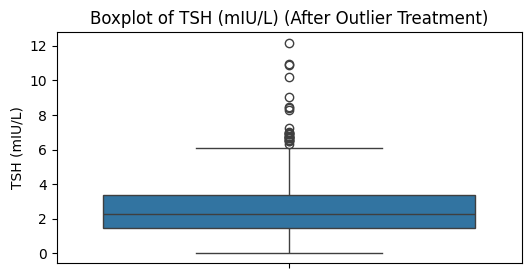

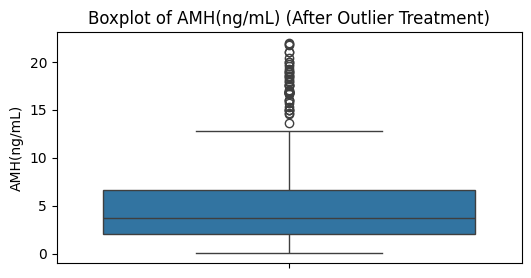

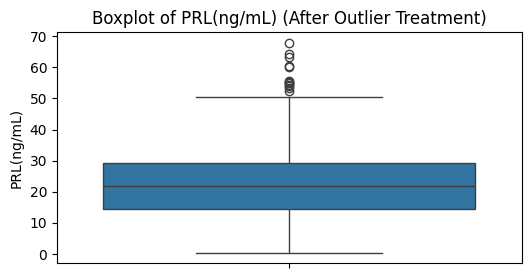

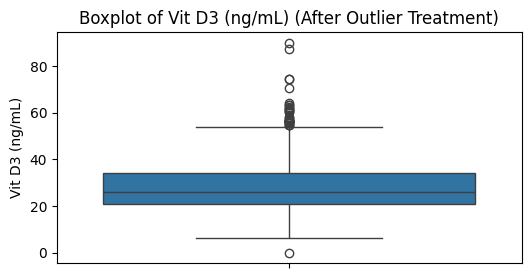

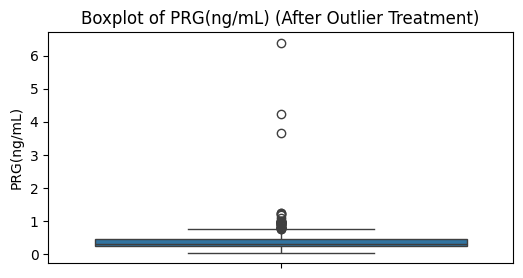

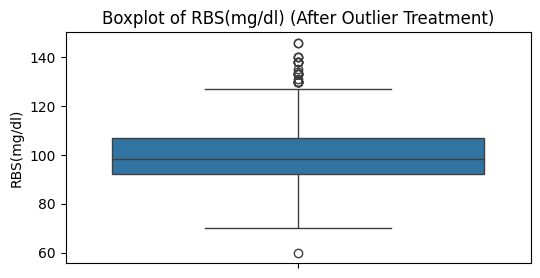

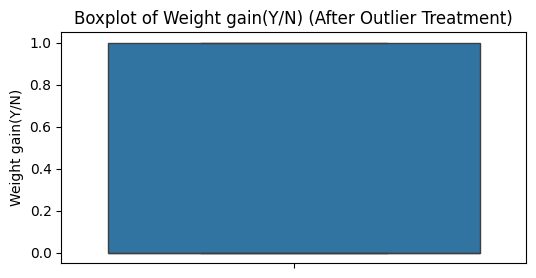

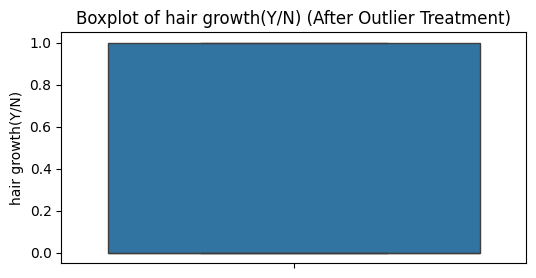

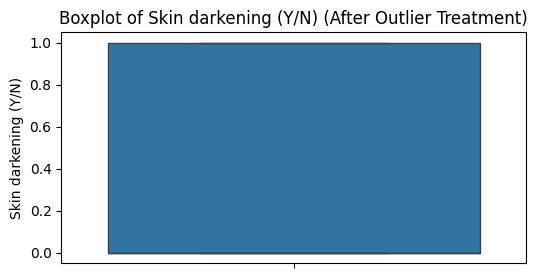

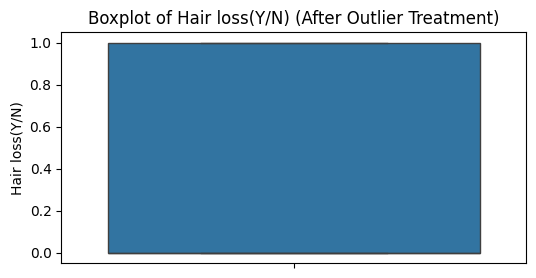

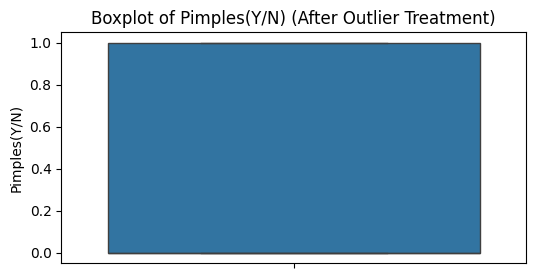

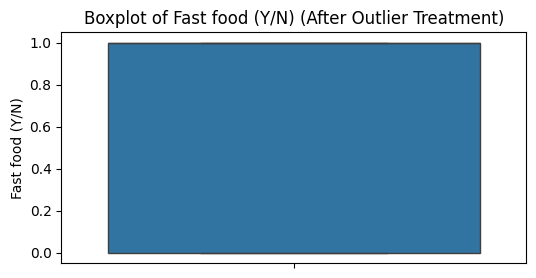

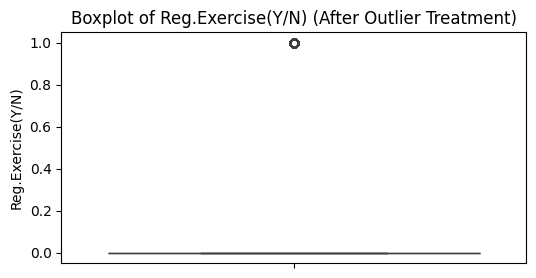

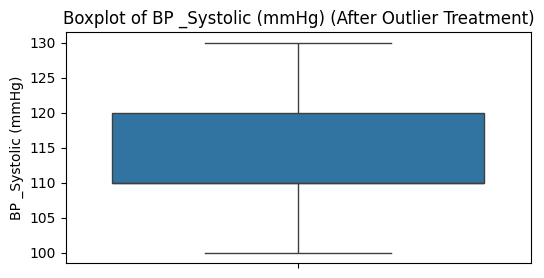

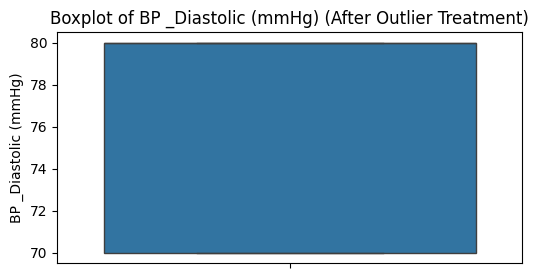

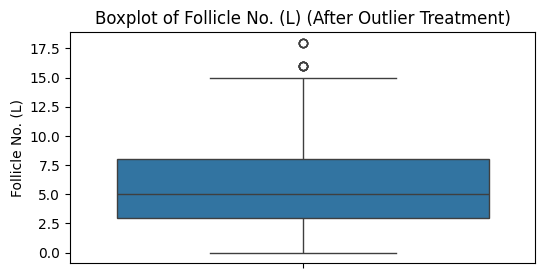

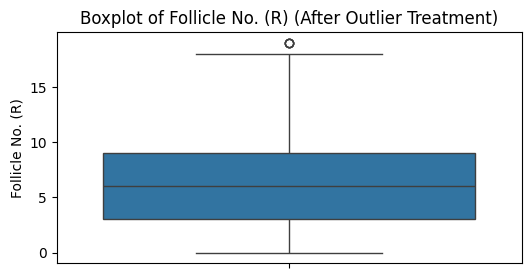

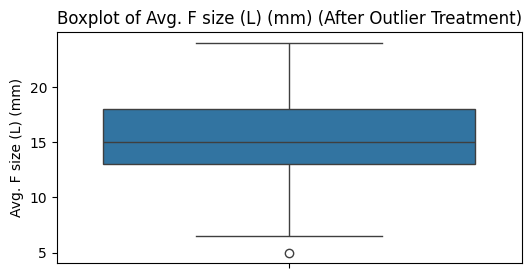

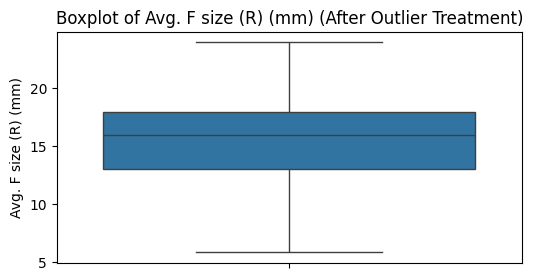

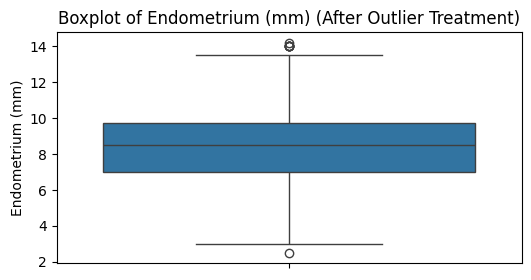

In [ ]:
for col in infertility_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(infertility_df[col])
    plt.title(f"Boxplot of {col} (After Outlier Treatment)")
    plt.show()

In [ ]:
print("Remaining outliers (Z > 3):", np.sum(np.abs(z_scores_after) > 3))

Remaining outliers (Z > 3): 132


We have detected and treated maximum outliers using Z Score method.

Handling Skewness

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Calculate skewness
skew_vals = infertility_df.select_dtypes(include='number').skew().sort_values(ascending=False)
print(skew_vals)

PRG(ng/mL)               9.977533
FSH(mIU/mL)              8.946233
I beta-HCG(mIU/mL)       8.011018
II beta-HCG(mIU/mL)      7.618579
FSH/LH                   5.421262
No. of abortions         2.372108
TSH (mIU/L)              1.732293
LH(mIU/mL)               1.660639
AMH(ng/mL)               1.595623
Pulse rate(bpm)          1.251609
Vit D3 (ng/mL)           1.236786
Reg.Exercise(Y/N)        1.175094
hair growth(Y/N)         1.021552
Cycle(R/I)               1.000518
PRL(ng/mL)               0.865790
Skin darkening (Y/N)     0.842900
RR (breaths/min)         0.830803
RBS(mg/dl)               0.813449
PCOS (Y/N)               0.738773
Follicle No. (L)         0.724488
Follicle No. (R)         0.677216
Marriage Status (Yrs)    0.670154
Hb(g/dl)                 0.516816
Weight gain(Y/N)         0.511724
Pregnant(Y/N)            0.495501
Age (yrs)                0.337167
Height(Cm)               0.304199
Weight (Kg)              0.279469
Endometrium (mm)         0.222147
Hair loss(Y/N)

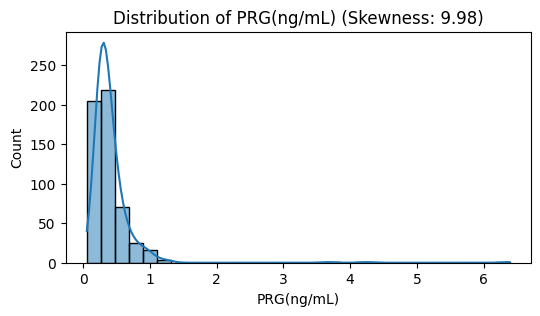

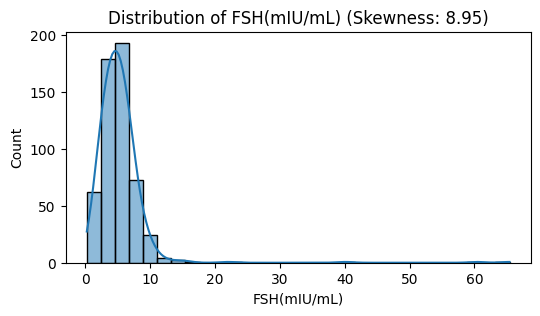

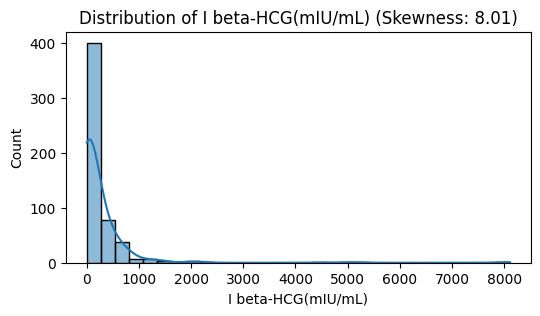

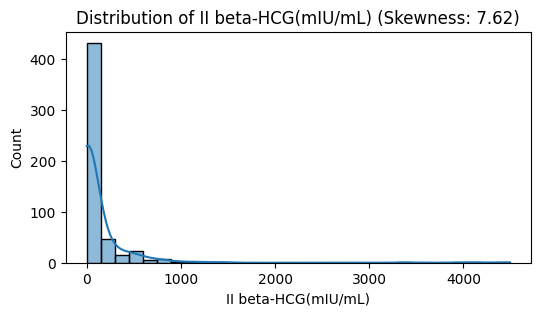

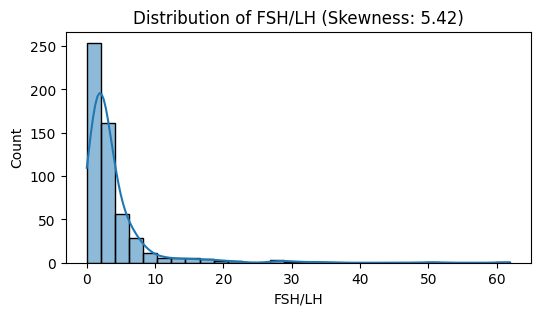

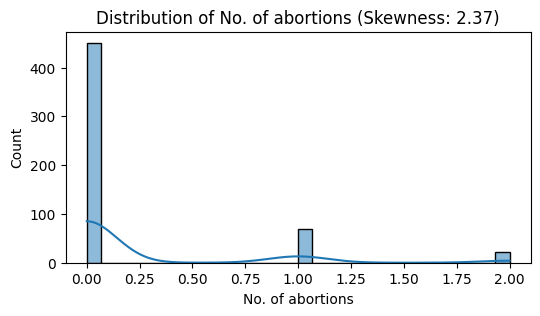

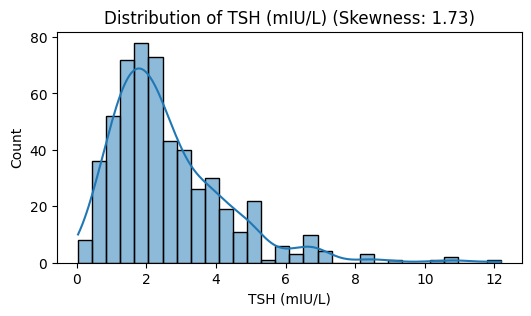

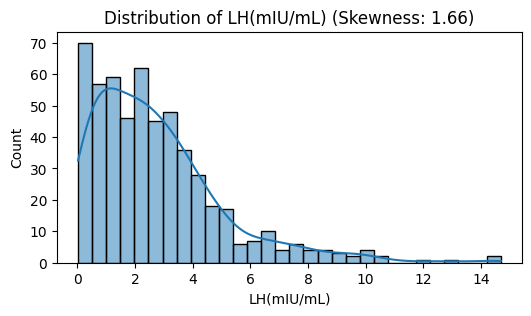

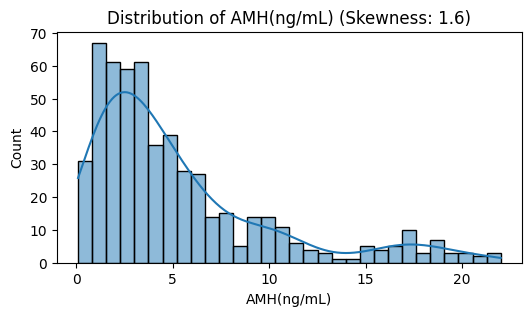

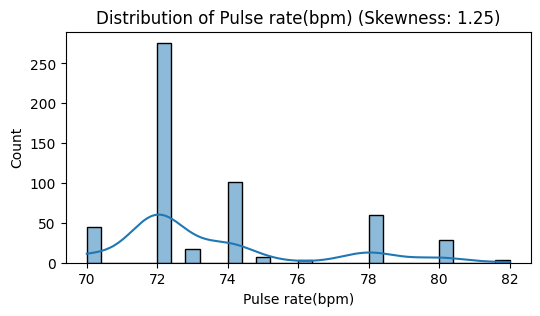

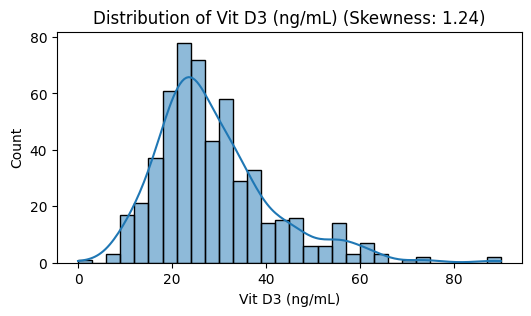

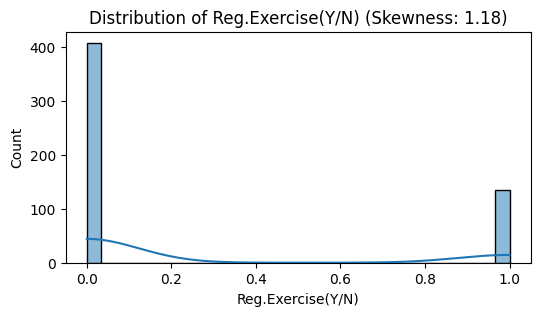

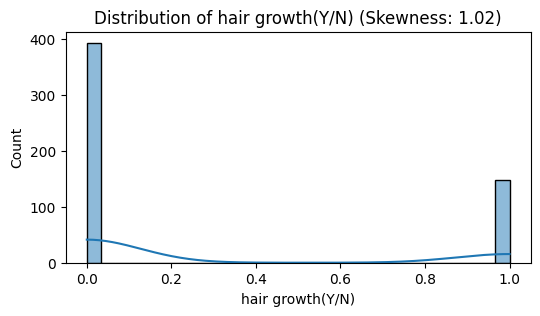

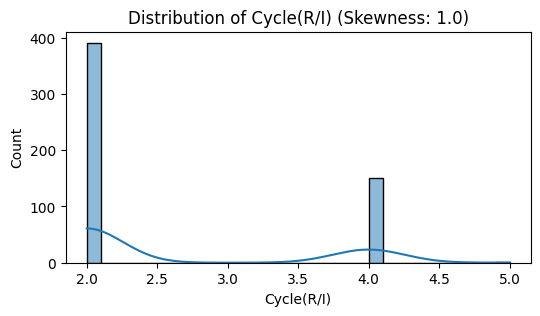

In [ ]:
for col in skew_vals[skew_vals > 1].index:
    plt.figure(figsize=(6, 3))
    sns.histplot(infertility_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (Skewness: {round(skew_vals[col], 2)})")
    plt.show()

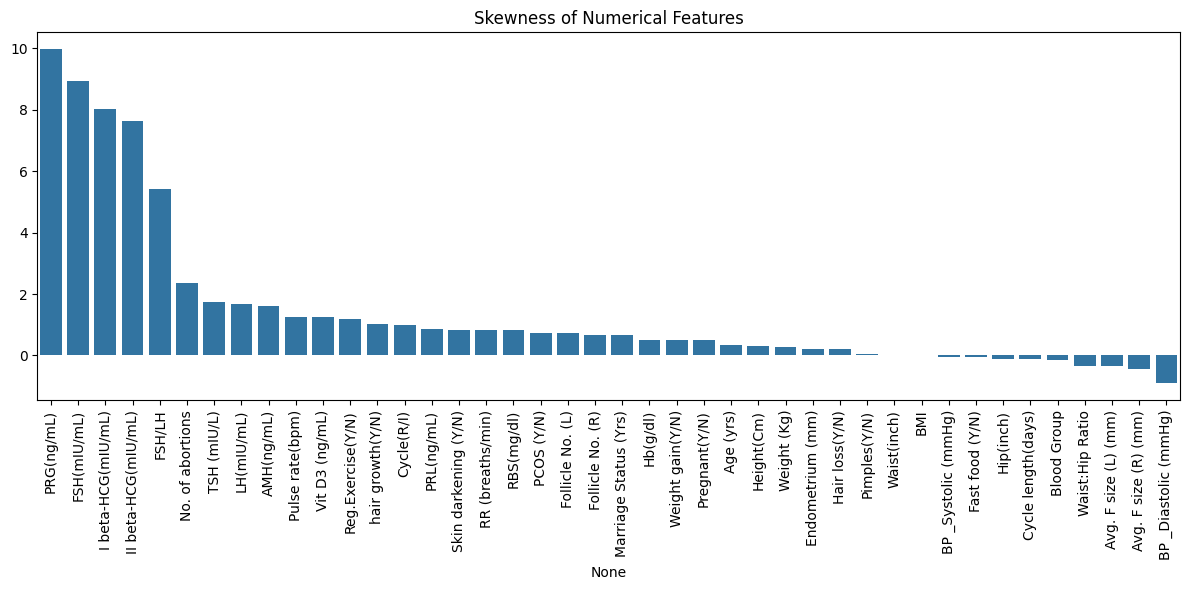

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=skew_vals.index, y=skew_vals.values)
plt.xticks(rotation=90)
plt.title("Skewness of Numerical Features")
plt.tight_layout()
plt.show()

Highly skewed features (absolute skew > 1):

Examples: PRG(ng/mL)', 'FSH(mIU/mL)', 'I beta-HCG(mIU/mL)','II beta-HCG(mIU/mL)', 'FSH/LH

These need transformation (e.g.,  log transformation, square root, or Box-Cox based on the feature.
Here we use Log Transformation.

In [ ]:
# Log transformation on highly skewed features
log_transform_cols = ['PRG(ng/mL)', 'FSH(mIU/mL)', 'I beta-HCG(mIU/mL)',
                      'II beta-HCG(mIU/mL)', 'FSH/LH']

for col in log_transform_cols:
    infertility_df[col] = np.log1p(infertility_df[col])

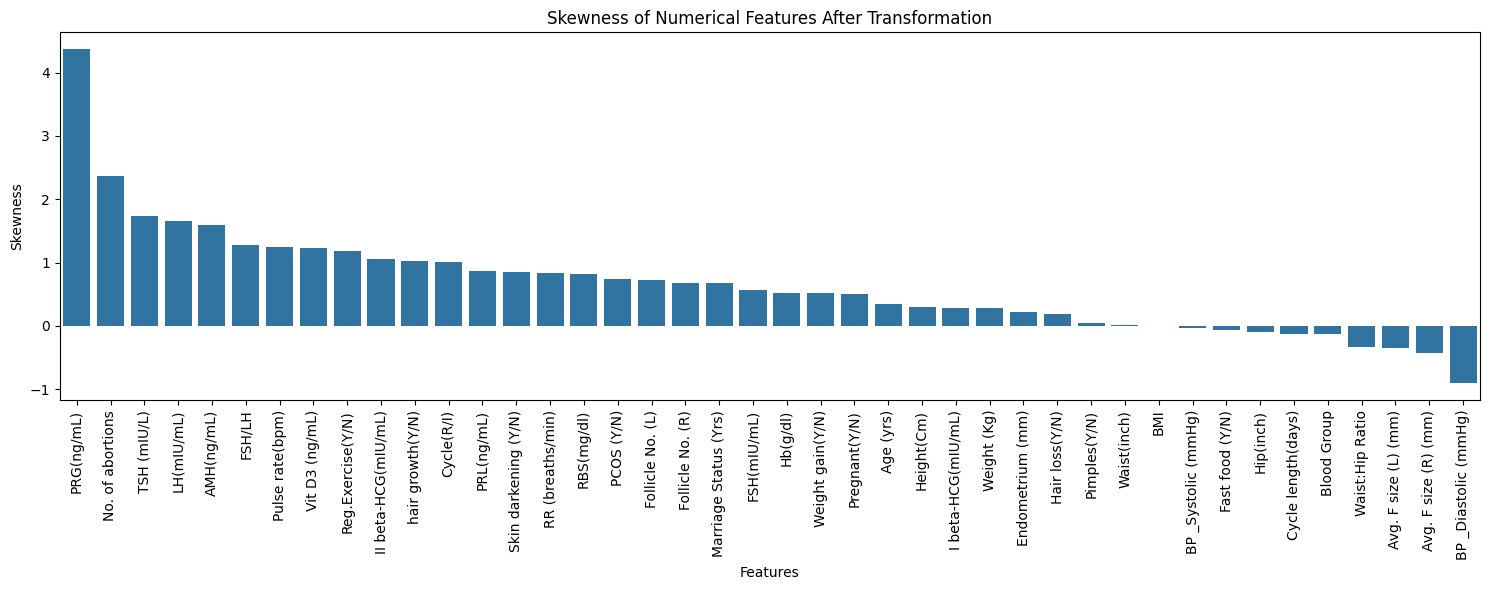

In [ ]:
numeric_cols = infertility_df.select_dtypes(include=['float64', 'int64']).columns

# Compute skewness for numeric features
skew_vals = infertility_df[numeric_cols].skew().sort_values(ascending=False)

# Plot skewness
plt.figure(figsize=(15, 6))
sns.barplot(x=skew_vals.index, y=skew_vals.values)
plt.xticks(rotation=90)
plt.title('Skewness of Numerical Features After Transformation')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# Compute Z-scores
z_scores = np.abs(zscore(infertility_df[numeric_cols]))

# Identify where Z > 3
outliers = (z_scores > 3).sum(axis=0)

# Total number of outlier rows
total_outlier_rows = (z_scores > 3).any(axis=1).sum()

# Print outliers per feature
outlier_df = pd.DataFrame({'Feature': numeric_cols, 'Outlier Count': outliers})
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)

print("Total rows with at least one outlier:", total_outlier_rows)
outlier_df.head(10)

Total rows with at least one outlier: 104


,Feature,Outlier Count
13,No. of abortions,22
7,RR (breaths/min),11
17,LH(mIU/mL),10
10,Cycle length(days),9
23,AMH(ng/mL),9
18,FSH/LH,8
22,TSH (mIU/L),8
24,PRL(ng/mL),5
16,FSH(mIU/mL),5
25,Vit D3 (ng/mL),5


In [ ]:
infertility_df.shape

(542, 42)

In [ ]:
infertility_df.skew()

,0
PCOS (Y/N),0.738773
Age (yrs),0.337167
Weight (Kg),0.279469
Height(Cm),0.304199
BMI,0.002567
Blood Group,-0.135698
Pulse rate(bpm),1.251609
RR (breaths/min),0.830803
Hb(g/dl),0.516816
Cycle(R/I),1.000518


No.of Abortions,PRG columns has high skewness

In [ ]:
infertility_df['No. of abortions_log'] = np.log(infertility_df['No. of abortions'] + 1)
print(infertility_df['No. of abortions_log'].skew())

2.031690562119248


In [ ]:
infertility_df.shape

(542, 43)

In [ ]:
infertility_df['No. of abortions_sqrt'] = np.sqrt(infertility_df['No. of abortions'])
print(infertility_df['No. of abortions_sqrt'].skew())


1.9169096148981501


In [ ]:
from scipy import stats
abortions_bc, fitted_lambda = stats.boxcox(infertility_df['No. of abortions'] + 1)

# Save to DataFrame
infertility_df['No. of abortions_boxcox'] = abortions_bc
print(pd.Series(abortions_bc).skew())

1.7819910048688175


In [ ]:
infertility_df.shape

(542, 45)

In [ ]:
infertility_df.drop(['No. of abortions', 'No. of abortions_log', 'No. of abortions_sqrt'], axis=1, inplace=True)


In [ ]:
from scipy import stats
PRG_bc, fitted_lambda = stats.boxcox(infertility_df['PRG(ng/mL)'] + 1)

# Save to DataFrame
infertility_df['PRG(ng/mL)'] = PRG_bc
print(pd.Series(abortions_bc).skew())

1.7819910048688175


In [ ]:
infertility_df.skew()

,0
PCOS (Y/N),0.738773
Age (yrs),0.337167
Weight (Kg),0.279469
Height(Cm),0.304199
BMI,0.002567
Blood Group,-0.135698
Pulse rate(bpm),1.251609
RR (breaths/min),0.830803
Hb(g/dl),0.516816
Cycle(R/I),1.000518


Now, the skewness have been almost treated.

In [ ]:
infertility_df.shape

(542, 42)

Univariate Analysis:-
This is a statistical method used for analysing single variable within a dataset.

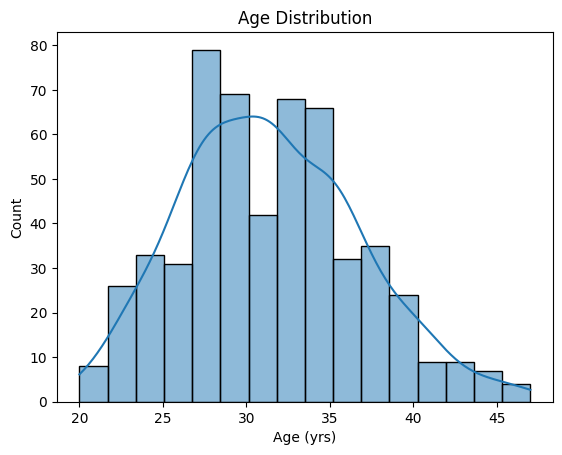

In [ ]:
sns.histplot(infertility_df['Age (yrs)'], kde=True)
plt.title("Age Distribution")
plt.show()

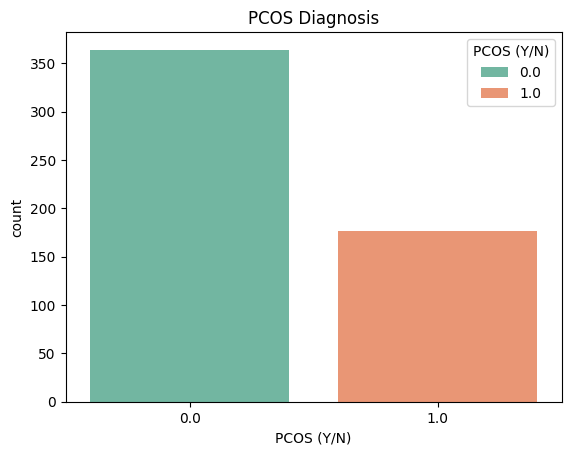

In [ ]:
# univariate analysis for target column'PCOS'
sns.countplot(x='PCOS (Y/N)', data=infertility_df, palette='Set2',hue='PCOS (Y/N)')
plt.title("PCOS Diagnosis")
plt.show()

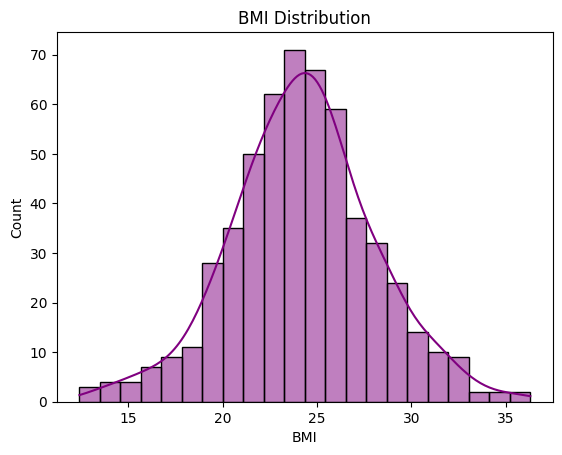

In [ ]:
#Univariate analysis for "BMI"
sns.histplot(infertility_df['BMI'], kde=True, color='purple')
plt.title("BMI Distribution")
plt.show()

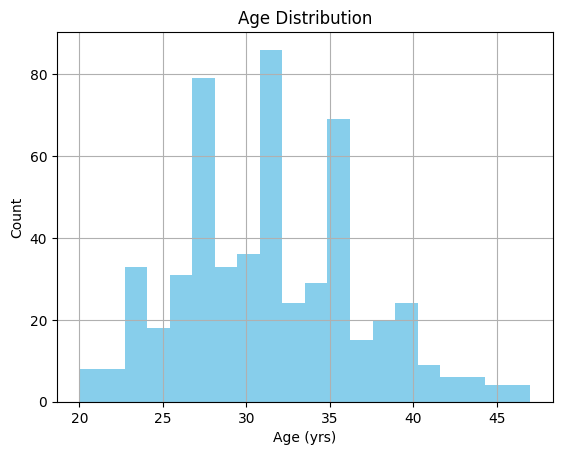

In [ ]:
#Univariate analysis for "Age"
infertility_df['Age (yrs)'] = infertility_df['Age (yrs)'].astype(float)
infertility_df['Age (yrs)'].hist(bins=20, color='skyblue')
plt.title("Age Distribution")
plt.xlabel('Age (yrs)')
plt.ylabel("Count")
plt.show()

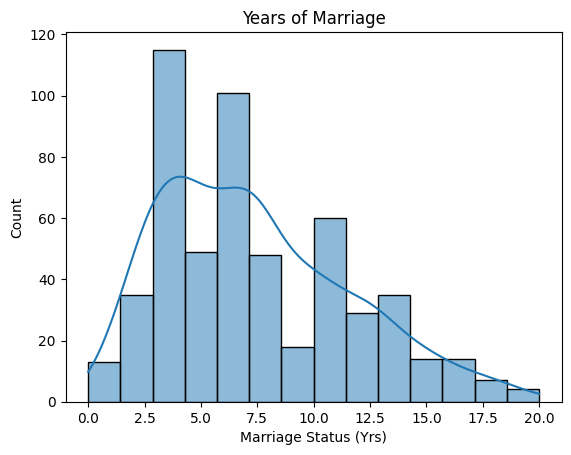

In [ ]:
#Univariate analysis for "Marriage Status"
infertility_df['Marriage Status (Yrs)'] = infertility_df['Marriage Status (Yrs)'].astype(float)
sns.histplot(infertility_df['Marriage Status (Yrs)'], kde=True)
plt.title("Years of Marriage")
plt.show()

INTERPRETATION:-

* Most women in the dataset are between 25–30 years old.

* A high number of women reported irregular cycles, which might indicate PCOS symptoms.

* Average BMI is higher among PCOS patients.



Bivariate Analysis:-
It is an statistical method used fornexamining how two variables are related.

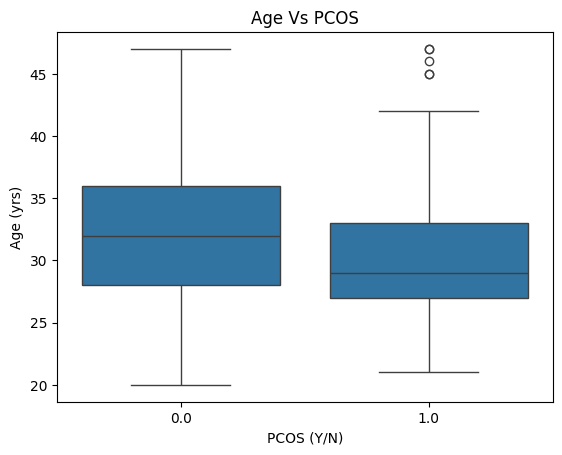

In [ ]:
#Bi-variate analysis for examining 'Age Vs PCOS'
sns.boxplot(x='PCOS (Y/N)',y='Age (yrs)', data=infertility_df)
plt.title('Age Vs PCOS')
plt.show()

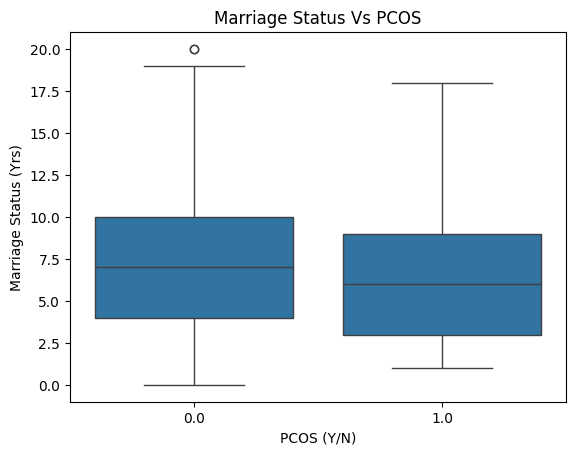

In [ ]:
#Bi-variate analysis for examining 'Marriage Status Vs PCOS'
sns.boxplot(x='PCOS (Y/N)',y='Marriage Status (Yrs)',data=infertility_df)
plt.title("Marriage Status Vs PCOS")
plt.show()

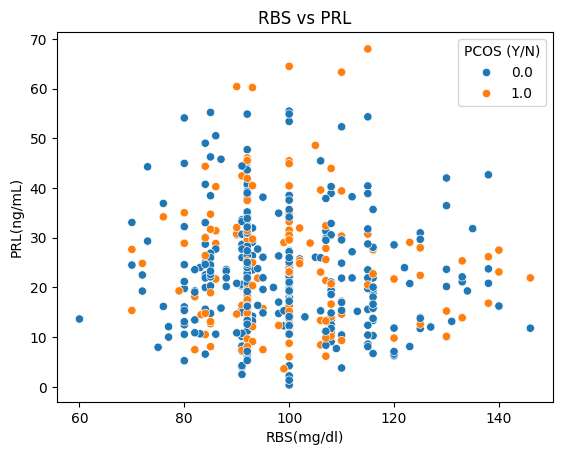

In [ ]:
#Bi-variate analysis for examining 'RBS vs PRL'
sns.scatterplot(x='RBS(mg/dl)', y='PRL(ng/mL)', hue='PCOS (Y/N)', data=infertility_df)
plt.title("RBS vs PRL")
plt.show()

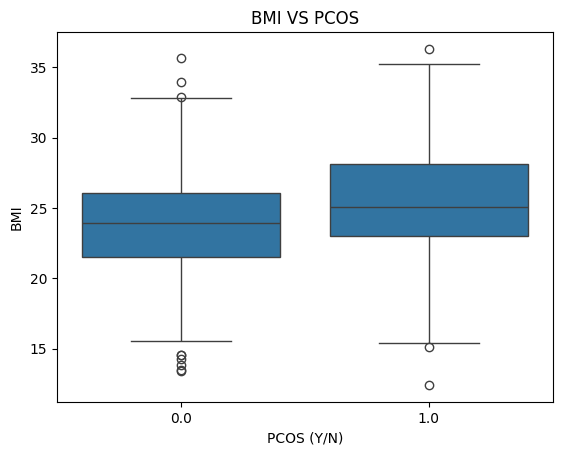

In [ ]:
#Bi-variate analysis for examining 'Marriage Status Vs PCOS'
sns.boxplot(x='PCOS (Y/N)',y='BMI',data=infertility_df)
plt.title("BMI VS PCOS")
plt.show()

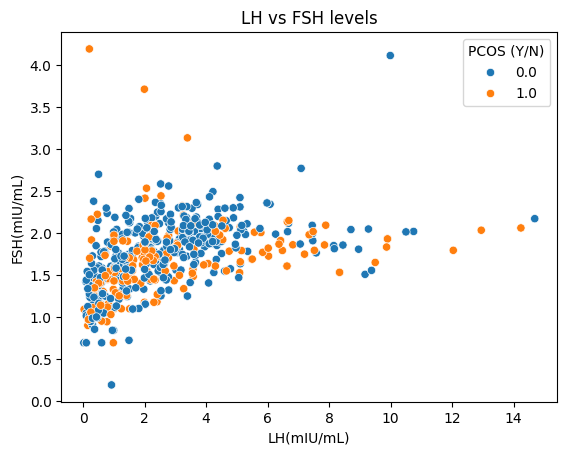

In [ ]:
#Bi-variate analysis for examining 'LH vs FSH'
sns.scatterplot(x='LH(mIU/mL)', y='FSH(mIU/mL)', hue='PCOS (Y/N)', data=infertility_df)
plt.title("LH vs FSH levels")
plt.show()

INTERPRETATION:-

* Women with PCOS tend to have higher BMI and irregular cycles.

* There is a strong correlation between LH (Luteinizing Hormone) and PCOS status.



Multivariate Analysis:-
this is an statistical method used to analyze the relationships between multiple variables simultaneously.

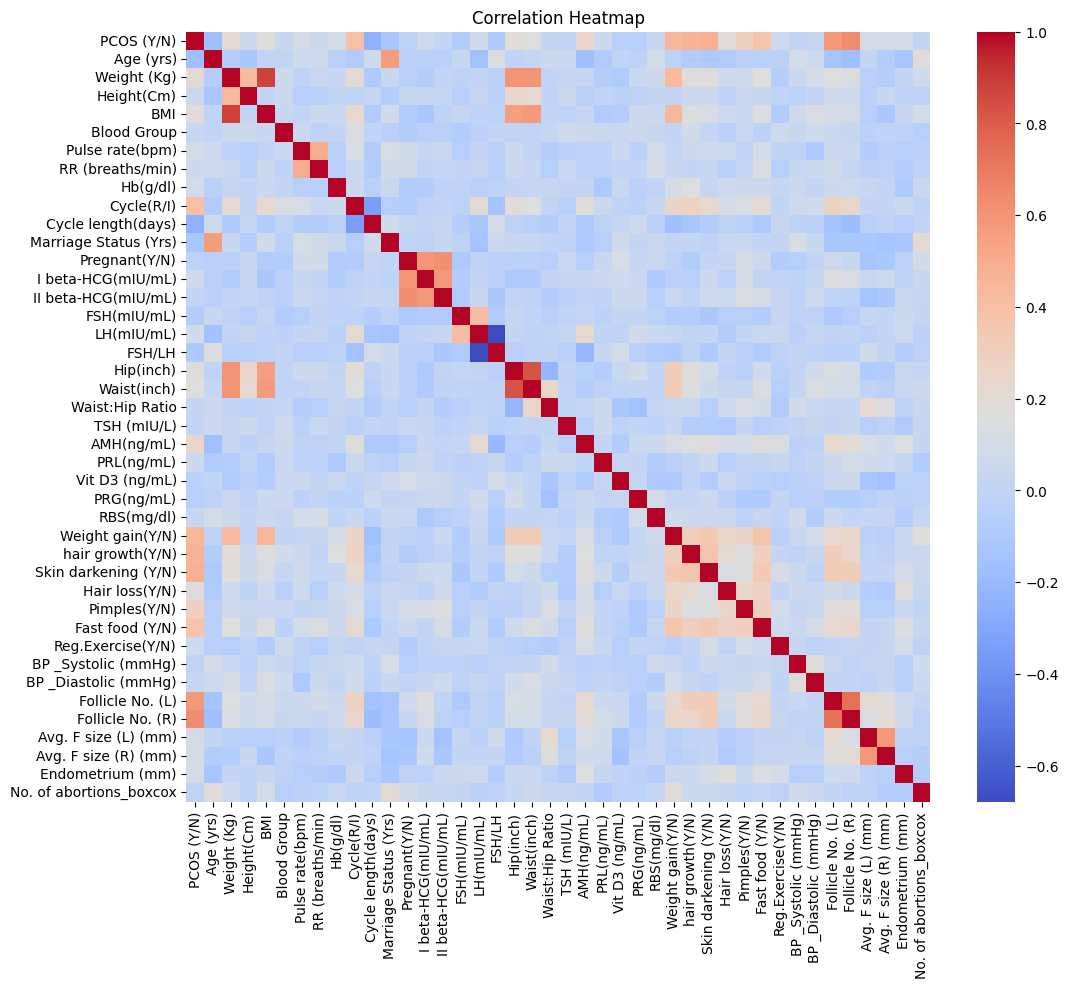

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(infertility_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

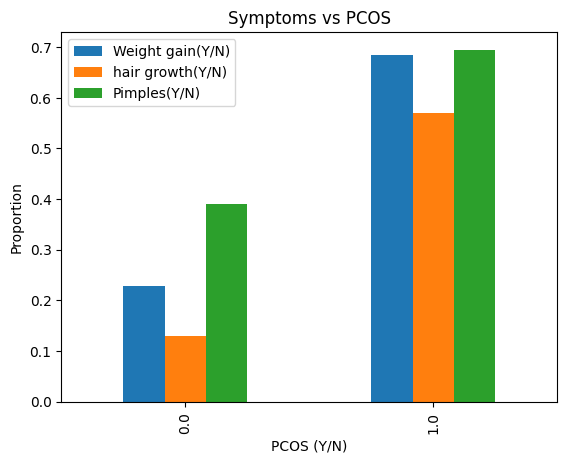

In [ ]:
# PCOS vs Symptoms
symptoms = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Pimples(Y/N)']
infertility_df[symptoms + ['PCOS (Y/N)']].groupby('PCOS (Y/N)').mean().plot(kind='bar')
plt.title("Symptoms vs PCOS")
plt.ylabel("Proportion")
plt.show()

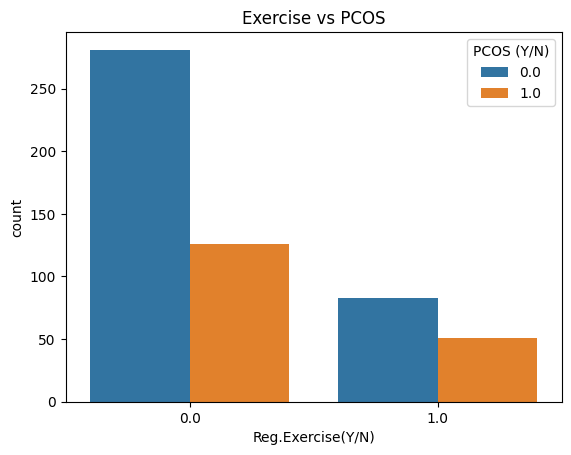

In [ ]:
# Exercise vs PCOS
sns.countplot(x='Reg.Exercise(Y/N)', hue='PCOS (Y/N)', data=infertility_df)
plt.title("Exercise vs PCOS")
plt.show()

INTERPRETATION:-

* The combination of elevated LH, irregular menstrual cycles, and high BMI strongly indicates the presence of PCOS.

* Logistic regression shows AMH, Weight, and Cycle(R/I) as the most influential predictors for PCOS.

# Stage 1: Data Preprocessing

In this stage, we:

- Loaded the dataset and explored its structure.
- Handled null values using imputation strategies.
- Identified and treated outliers.
- Checked skewness of numerical features and applied transformations where required.
- Visualized the effect of skewness treatment using histograms and boxplots.


# FEATURE ENGINEERING

In [ ]:
#Drop unnecessary columns
#'Sl. No','Patient File No.' columns have been removed

In [ ]:
infertility_df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),No. of abortions_boxcox
0,0.0,28.0,44.6,152.0,19.30,15.0,78.0,22.0,10.48,2.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,0.0
1,0.0,36.0,65.0,161.5,24.92,15.0,74.0,20.0,11.70,2.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,0.0
2,1.0,33.0,68.8,165.0,25.27,11.0,72.0,18.0,11.80,2.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,0.0
3,0.0,37.0,65.0,148.0,29.67,13.0,72.0,20.0,12.00,2.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,0.0
4,0.0,25.0,52.0,161.0,20.06,11.0,72.0,18.0,10.00,2.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,0.0


In [ ]:
print(infertility_df['PCOS (Y/N)'].unique())

[ 0.  1. nan]


In [ ]:
yn_cols = ['Cycle(R/I)','PCOS (Y/N)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
           'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
           'Reg.Exercise(Y/N)']

In [ ]:
for col in yn_cols:
    if infertility_df[col].dtype == 'object':
        infertility_df[col] = infertility_df[col].map({'Y': 1, 'N': 0})

In [ ]:
infertility_df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),No. of abortions_boxcox
0,0.0,28.0,44.6,152.0,19.30,15.0,78.0,22.0,10.48,2.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,0.0
1,0.0,36.0,65.0,161.5,24.92,15.0,74.0,20.0,11.70,2.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,0.0
2,1.0,33.0,68.8,165.0,25.27,11.0,72.0,18.0,11.80,2.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,0.0
3,0.0,37.0,65.0,148.0,29.67,13.0,72.0,20.0,12.00,2.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,0.0
4,0.0,25.0,52.0,161.0,20.06,11.0,72.0,18.0,10.00,2.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,0.0


In [ ]:
#creating new features
infertility_df['LH_to_AMH'] = infertility_df['LH(mIU/mL)'] / (infertility_df['AMH(ng/mL)'] + 1e-5)

In [ ]:
infertility_df['BMI_Category'] = pd.cut(infertility_df['BMI'], bins=[0,18.5,24.9,29.9,100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [ ]:
# Encode categorical
infertility_df['BMI_Category'] = infertility_df['BMI_Category'].astype(str)
df = pd.get_dummies(infertility_df, columns=['BMI_Category'], drop_first=True)


In [ ]:
infertility_df['Age_Group'] = pd.cut(infertility_df['Age (yrs)'], bins=[15, 25, 30, 35, 40, 45],
                         labels=['15-25', '25-30', '30-35', '35-40', '40-45'])

In [ ]:
infertility_df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),No. of abortions_boxcox,LH_to_AMH,BMI_Category,Age_Group
0,0.0,28.0,44.6,152.0,19.30,15.0,78.0,22.0,10.48,2.0,...,80.0,3.0,3.0,18.0,18.0,8.5,0.0,1.777769,Normal,25-30
1,0.0,36.0,65.0,161.5,24.92,15.0,74.0,20.0,11.70,2.0,...,70.0,3.0,5.0,15.0,14.0,3.7,0.0,0.712414,Overweight,35-40
2,1.0,33.0,68.8,165.0,25.27,11.0,72.0,18.0,11.80,2.0,...,80.0,13.0,15.0,18.0,20.0,10.0,0.0,0.132730,Overweight,30-35
3,0.0,37.0,65.0,148.0,29.67,13.0,72.0,20.0,12.00,2.0,...,70.0,2.0,2.0,15.0,14.0,7.5,0.0,1.934410,Overweight,35-40
4,0.0,25.0,52.0,161.0,20.06,11.0,72.0,18.0,10.00,2.0,...,80.0,3.0,4.0,16.0,14.0,7.0,0.0,0.398228,Normal,15-25


In [ ]:
#Handling skewed features(Log Transformations)
skewed_cols = ['AMH(ng/mL)', 'LH(mIU/mL)', 'FSH(mIU/mL)', 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)']
for col in skewed_cols:
    infertility_df[col] = np.log1p(infertility_df[col])

In [ ]:
infertility_df['PCOS (Y/N)'] = infertility_df['PCOS (Y/N)'].astype(float)

In [ ]:
infertility_df.shape

(542, 45)

In [ ]:
print(infertility_df['PCOS (Y/N)'].unique())

[ 0.  1. nan]


# Verifying for null values:-

In [ ]:
infertility_df.isnull().sum()

,0
PCOS (Y/N),1
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0
Cycle(R/I),0


In [ ]:
# Verify that no missing values remain
print("Remaining missing values per column:")
print(infertility_df.isnull().sum())

Remaining missing values per column:
PCOS (Y/N)                 1
Age (yrs)                  0
Weight (Kg)                0
Height(Cm)                 0
BMI                        0
Blood Group                0
Pulse rate(bpm)            0
RR (breaths/min)           0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marriage Status (Yrs)      0
Pregnant(Y/N)              0
I beta-HCG(mIU/mL)         0
II beta-HCG(mIU/mL)        0
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 0
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
Weight gain(Y/N)           0
hair growth(Y/N)           0
Skin darkening (Y/N)       0
Hair loss(Y/N)             0
Pimples(Y/N)               0
Fast food (Y/N)            0
Reg.Ex

There are some more missing values in 'Age' and 'PCOS' columns,
so we need to use mode function to handle these missing values.

In [ ]:
infertility_df['Age (yrs)'] = infertility_df['Age (yrs)'].fillna(infertility_df['Age (yrs)'].mode()[0])

In [ ]:
infertility_df.shape

(542, 45)

In [ ]:
df.shape

(542, 46)

In [ ]:
infertility_df.tail()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),No. of abortions_boxcox,LH_to_AMH,BMI_Category,Age_Group
541,0.0,35.0,50.0,164.592,18.46,17.0,72.0,16.0,11.0,2.0,...,70.0,1.0,0.0,17.5,10.0,6.7,0.135326,1.064700,Underweight,30-35
542,0.0,30.0,63.2,158.000,25.32,15.0,72.0,18.0,10.8,2.0,...,70.0,9.0,7.0,19.0,18.0,8.2,0.135326,0.507142,Overweight,25-30
543,0.0,36.0,54.0,152.000,23.37,13.0,74.0,20.0,10.8,2.0,...,80.0,1.0,0.0,18.0,9.0,7.3,0.000000,0.751349,Normal,35-40
544,0.0,27.0,50.0,150.000,22.22,15.0,74.0,20.0,12.0,4.0,...,70.0,7.0,6.0,18.0,16.0,11.5,0.000000,0.832691,Normal,25-30
545,1.0,23.0,82.0,165.000,30.12,13.0,80.0,20.0,10.2,4.0,...,70.0,9.0,10.0,19.0,18.0,6.9,0.000000,0.215000,Obese,15-25


In [ ]:
print(infertility_df['PCOS (Y/N)'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
541    0.0
542    0.0
543    0.0
544    0.0
545    1.0
Name: PCOS (Y/N), Length: 542, dtype: float64>


In [ ]:
infertility_df.shape

(542, 45)

In [ ]:
infertility_df.isnull().sum()

,0
PCOS (Y/N),1
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0
Cycle(R/I),0


In [ ]:
print(infertility_df['Cycle(R/I)'].unique())

[2. 4. 5.]


In [ ]:
infertility_df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),No. of abortions_boxcox,LH_to_AMH,BMI_Category,Age_Group
0,0.0,28.0,44.6,152.0,19.30,15.0,78.0,22.0,10.48,2.0,...,80.0,3.0,3.0,18.0,18.0,8.5,0.0,1.777769,Normal,25-30
1,0.0,36.0,65.0,161.5,24.92,15.0,74.0,20.0,11.70,2.0,...,70.0,3.0,5.0,15.0,14.0,3.7,0.0,0.712414,Overweight,35-40
2,1.0,33.0,68.8,165.0,25.27,11.0,72.0,18.0,11.80,2.0,...,80.0,13.0,15.0,18.0,20.0,10.0,0.0,0.132730,Overweight,30-35
3,0.0,37.0,65.0,148.0,29.67,13.0,72.0,20.0,12.00,2.0,...,70.0,2.0,2.0,15.0,14.0,7.5,0.0,1.934410,Overweight,35-40
4,0.0,25.0,52.0,161.0,20.06,11.0,72.0,18.0,10.00,2.0,...,80.0,3.0,4.0,16.0,14.0,7.0,0.0,0.398228,Normal,15-25


In [ ]:
infertility_df['Age_Group'] = infertility_df['Age_Group'].fillna(infertility_df['Age_Group'].mode()[0])

In [ ]:
infertility_df['PCOS (Y/N)'] = infertility_df['PCOS (Y/N)'].fillna(infertility_df['PCOS (Y/N)'].mean())

In [ ]:
# Verify if there are any remaining null values
null_counts = infertility_df.isnull().sum()

if null_counts.sum() == 0:
    print("No missing values remaining. Data is clean!")
else:
    print("Missing values still exist in the following columns:")
    print(null_counts[null_counts > 0])

No missing values remaining. Data is clean!


In [ ]:
infertility_df.shape

(542, 45)

Now the dataset is cleaned

# FEATURE SELECTION:-

Drop irrelevant features:

['Sl. No', 'Patient File No.', 'Unnamed: 44']
we have already removed irrelevant features.


Encoding Categorial variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
               'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
               'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

le = LabelEncoder()
for col in binary_cols:
    infertility_df[col] = le.fit_transform(infertility_df[col])

In [ ]:
infertility_df.shape

(542, 45)

In [ ]:
df.shape

(542, 46)

In [ ]:
# Drop the row with NaN in the target
df_clean = df[df['PCOS (Y/N)'].notna()].reset_index(drop=True)

In [ ]:
X = df_clean.drop("PCOS (Y/N)", axis=1)
y = df_clean["PCOS (Y/N)"]

In [ ]:
df_clean.shape

(541, 46)

In [ ]:
print(X.shape, y.shape)

(541, 45) (541,)


In [ ]:
df_clean.shape

(541, 46)

In [ ]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Drop rows where target is NaN
df_clean = df.dropna(subset=["PCOS (Y/N)"])

# Separate features and target
X = df_clean.drop("PCOS (Y/N)", axis=1)
y = df_clean["PCOS (Y/N)"]

# Impute missing values in features
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Remove constant features (zero variance)
var_thresh = VarianceThreshold(threshold=0.0)
X_var = var_thresh.fit_transform(X_imputed)

# Feature selection: select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_var, y)

Feature Selection Methods selected are:
* I selected SelectKBest with f_classif for feature selection because it is a straightforward and effective statistical method to identify the most relevant features for classification problems.

* f_classif uses ANOVA F-value to measure the relationship between each independent variable and the target variable. This helps in:

1. Reducing dimensionality,

2. Eliminating less informative or noisy features,

3. Improving model performance and interpretability.

Since our target is binary classification (PCOS (Y/N)), and many of the features are numerical, this method is well-suited for evaluating feature significance quickly before applying machine learning models.

# FEATURE SCALING

In [ ]:
#Test-Train-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape

(432, 10)

In [ ]:
X_test.shape


(109, 10)

In [ ]:
y_train.shape

(432,)

In [ ]:
y_test.shape

(109,)

# Stage 2: Feature Engineering and Selection
In this stage, we:

- Encoded categorical variables (if any).
- Scaled features using StandardScaler.
- Used `SelectKBest` with ANOVA F-test for feature selection.
- Identified the top 10 most influential features contributing to the prediction of PCOS.
- Split the data into training and test sets.

# MODEL BUILDING

  # Stage 3: Model Building and Evaluation

  In this stage, we:

  - Built models using various algorithms like:
  - Logistic Regression
  - Random Forest Classifier
  - Support Vector Machine (SVM)
  - Evaluated models using accuracy, confusion matrix, and classification reports.

In [ ]:
#Model Building using randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.908256880733945


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

[[69  4]
 [ 6 30]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93        73
         1.0       0.88      0.83      0.86        36

    accuracy                           0.91       109
   macro avg       0.90      0.89      0.89       109
weighted avg       0.91      0.91      0.91       109



              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93        73
         1.0       0.88      0.83      0.86        36

    accuracy                           0.91       109
   macro avg       0.90      0.89      0.89       109
weighted avg       0.91      0.91      0.91       109



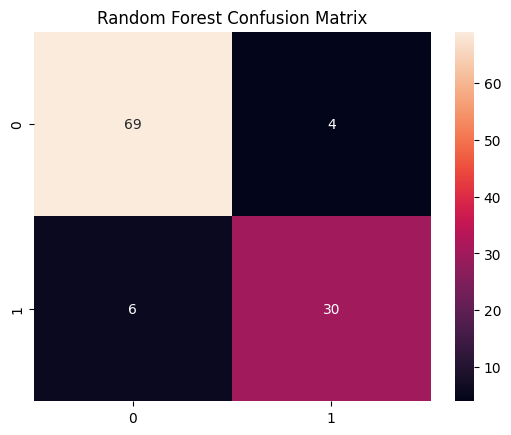

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, rf_preds))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


Random forest have 90% accuracy

In [ ]:
# trying model building with different models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

Classifier_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear',max_iter=1000),
    "KNN (K=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=6,random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=7,random_state=42),
    "SVM": SVC(),
    "Gaussian NB": GaussianNB(),
    "XGBoost": XGBClassifier()}
# to store result
results = []

# Train and evaluate model
for name, model in Classifier_models.items():
    model.fit(X_train_scaled, y_train)
    model_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, model_pred)
    f1 = f1_score(y_test, model_pred,average='weighted')

    results.append((name, acc, f1))
    print(f"{name}: Accuracy = {acc:.2f}, F1-Score = {f1:.2f}")


Logistic Regression: Accuracy = 0.91, F1-Score = 0.91
KNN (K=5): Accuracy = 0.85, F1-Score = 0.85
Decision Tree: Accuracy = 0.85, F1-Score = 0.85
Random Forest: Accuracy = 0.91, F1-Score = 0.91
SVM: Accuracy = 0.89, F1-Score = 0.89
Gaussian NB: Accuracy = 0.93, F1-Score = 0.93
XGBoost: Accuracy = 0.91, F1-Score = 0.91


In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df.sort_values(by="F1 Score", ascending=False))

                 Model  Accuracy  F1 Score
5          Gaussian NB  0.926606  0.927088
6              XGBoost  0.908257  0.907566
0  Logistic Regression  0.908257  0.907566
3        Random Forest  0.908257  0.906782
4                  SVM  0.889908  0.889079
1            KNN (K=5)  0.853211  0.850851
2        Decision Tree  0.853211  0.847849


From the models, Gaussian NB have 92% accuracy.

# MODEL PREDICTION RESULT

In [ ]:
df['Fertile/Non Fertile'] = df['PCOS (Y/N)'].apply(lambda x: 'Infertile' if x == 1 else 'Fertile')
df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),No. of abortions_boxcox,LH_to_AMH,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,Fertile/Non Fertile
0,0.0,28.0,44.6,152.000,19.30,15.0,78.0,22.0,10.48,2.0,...,3.0,18.0,18.0,8.5,0.000000,1.777769,False,False,False,Fertile
1,0.0,36.0,65.0,161.500,24.92,15.0,74.0,20.0,11.70,2.0,...,5.0,15.0,14.0,3.7,0.000000,0.712414,False,True,False,Fertile
2,1.0,33.0,68.8,165.000,25.27,11.0,72.0,18.0,11.80,2.0,...,15.0,18.0,20.0,10.0,0.000000,0.132730,False,True,False,Infertile
3,0.0,37.0,65.0,148.000,29.67,13.0,72.0,20.0,12.00,2.0,...,2.0,15.0,14.0,7.5,0.000000,1.934410,False,True,False,Fertile
4,0.0,25.0,52.0,161.000,20.06,11.0,72.0,18.0,10.00,2.0,...,4.0,16.0,14.0,7.0,0.000000,0.398228,False,False,False,Fertile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,0.0,35.0,50.0,164.592,18.46,17.0,72.0,16.0,11.00,2.0,...,0.0,17.5,10.0,6.7,0.135326,1.064700,False,False,True,Fertile
542,0.0,30.0,63.2,158.000,25.32,15.0,72.0,18.0,10.80,2.0,...,7.0,19.0,18.0,8.2,0.135326,0.507142,False,True,False,Fertile
543,0.0,36.0,54.0,152.000,23.37,13.0,74.0,20.0,10.80,2.0,...,0.0,18.0,9.0,7.3,0.000000,0.751349,False,False,False,Fertile
544,0.0,27.0,50.0,150.000,22.22,15.0,74.0,20.0,12.00,4.0,...,6.0,18.0,16.0,11.5,0.000000,0.832691,False,False,False,Fertile


A new column is created ' Fertile/Infertile' which is based on pcos. if the patient has PCOS, if PCOS = 0, then considered as fertile.

In [ ]:
selected_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]

results_df = pd.DataFrame(X_test, columns=selected_feature_names)
results_df['Actual'] = y_test.values
results_df['Predicted'] = rf_preds
results_df['Fertility Status'] = ['Fertile' if pred == 0 else 'Infertile' for pred in rf_preds]
results_df

,Cycle(R/I),Cycle length(days),AMH(ng/mL),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R),Actual,Predicted,Fertility Status
0,2.0,5.0,16.90,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,Fertile
1,2.0,4.0,6.00,0.0,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,Fertile
2,2.0,5.0,3.88,0.0,0.0,0.0,0.0,0.0,8.0,10.0,0.0,0.0,Fertile
3,4.0,5.0,4.57,1.0,0.0,1.0,0.0,1.0,12.0,15.0,1.0,1.0,Infertile
4,2.0,5.0,0.72,0.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,0.0,Fertile
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,4.0,4.0,5.69,1.0,1.0,0.0,1.0,1.0,7.0,9.0,1.0,1.0,Infertile
105,4.0,2.0,4.00,1.0,1.0,0.0,0.0,1.0,4.0,12.0,1.0,1.0,Infertile
106,2.0,6.0,2.90,0.0,0.0,0.0,1.0,0.0,5.0,7.0,0.0,0.0,Fertile
107,2.0,5.0,0.56,0.0,0.0,0.0,0.0,0.0,4.0,6.0,0.0,0.0,Fertile


In [ ]:
infertility_df = pd.DataFrame(X_test, columns=selected_feature_names)
infertility_df['Actual'] = y_test.values
infertility_df['Predicted'] = rf_preds
infertility_df['Fertility Status'] = ['Fertile' if pred == 0 else 'Infertile' for pred in rf_preds]
infertility_df

,Cycle(R/I),Cycle length(days),AMH(ng/mL),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R),Actual,Predicted,Fertility Status
0,2.0,5.0,16.90,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,Fertile
1,2.0,4.0,6.00,0.0,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,Fertile
2,2.0,5.0,3.88,0.0,0.0,0.0,0.0,0.0,8.0,10.0,0.0,0.0,Fertile
3,4.0,5.0,4.57,1.0,0.0,1.0,0.0,1.0,12.0,15.0,1.0,1.0,Infertile
4,2.0,5.0,0.72,0.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,0.0,Fertile
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,4.0,4.0,5.69,1.0,1.0,0.0,1.0,1.0,7.0,9.0,1.0,1.0,Infertile
105,4.0,2.0,4.00,1.0,1.0,0.0,0.0,1.0,4.0,12.0,1.0,1.0,Infertile
106,2.0,6.0,2.90,0.0,0.0,0.0,1.0,0.0,5.0,7.0,0.0,0.0,Fertile
107,2.0,5.0,0.56,0.0,0.0,0.0,0.0,0.0,4.0,6.0,0.0,0.0,Fertile


In [ ]:
print(infertility_df['Fertility Status'].value_counts())

Fertility Status
Fertile      75
Infertile    34
Name: count, dtype: int64


<ipython-input-950-8b46ad944516>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statuses, y=counts, palette='pastel')


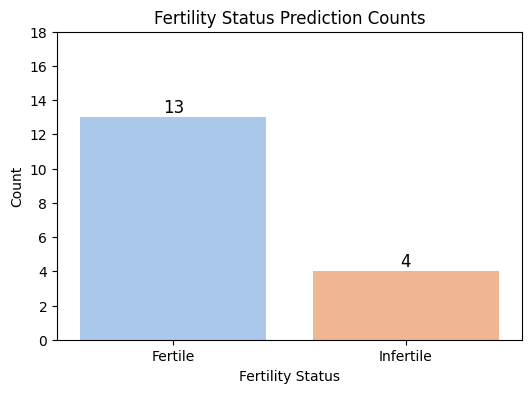

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data - replace this with your actual counts if needed
fertility_counts = {'Fertile': 13, 'Infertile': 4}

# Convert to lists for plotting
statuses = list(fertility_counts.keys())
counts = list(fertility_counts.values())

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=statuses, y=counts, palette='pastel')

plt.title('Fertility Status Prediction Counts')
plt.xlabel('Fertility Status')
plt.ylabel('Count')
plt.ylim(0, max(counts)+5)

for i, count in enumerate(counts):
    plt.text(i, count + 0.3, str(count), ha='center', fontsize=12)

plt.show()

## Final Prediction Results: Fertility Status

After applying the trained model on the test dataset, the predicted fertility status counts are:

FERTILITY-STATUS COUNT:-
* FERTILE - 13
* INFERTILE - 4

This shows that out of the tested samples, **13** were predicted to be fertile, while **4** were predicted to be infertile.

---

### What this means

The model uses input features like PCOS, cycle length, blood sugar, weight gain, and other clinical factors to predict fertility status. These results provide a clear classification to assist in understanding potential infertility based on the data.


# SAMPLE PREDICTION

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scaler instance
scaler = StandardScaler()

# Fit scaler only on training data
scaler.fit(X_train)  # X_train is your training features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'n_estimators': [50, 100]})

In [ ]:
import numpy as np

# New sample input (replace with your values)
sample_input = np.array([[1.1, 5.0, 0.0, 1.0, 0.0, 0.0, 7.0, 8.0, 1.05, 0.74]])

# Scale this new input using the already fitted scaler instance
sample_input_scaled = scaler.transform(sample_input)

# Predict using your trained model
prediction = rf.predict(sample_input_scaled)

# Convert numeric prediction to label
label = 'Fertile' if prediction == 0 else 'Infertile'
print(f"Predicted fertility status: {label}")


Predicted fertility status: Fertile


    1.1,  # Cycle(R/I) - e.g. 1.1 (numeric encoding for Regular/Irregular)
    5.0,  # Cycle length(days)
    0.0,  # RBS(mg/dl)
    1.0,  # Weight gain(Y/N) (1 means yes)
    0.0,  # hair growth(Y/N)
    0.0,  # Pimples(Y/N)
    7.0,  # BP_Systolic (mmHg)
    8.0,  # BP_Diastolic (mmHg)
    1.05, # Avg. F size (R) (mm)
    0.74  # Endometrium (mm)

# MODEL EVALUATION AND COMPARISON

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df.sort_values(by="F1 Score", ascending=False))

                 Model  Accuracy  F1 Score
5          Gaussian NB  0.926606  0.927088
6              XGBoost  0.908257  0.907566
0  Logistic Regression  0.908257  0.907566
3        Random Forest  0.908257  0.906782
4                  SVM  0.889908  0.889079
1            KNN (K=5)  0.853211  0.850851
2        Decision Tree  0.853211  0.847849


Gaussian NB have 92% accuracy.
The three top models are giving 90%
 * Logistic Regression
 * XG Boost
 * Random Forest

  but Random Forest is more flexible for tuning. So let's tune it.

# HYPERPARAMETER TUNING

We Use GridSearch CV for tuning our model(Random Forest)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters to tune

rf_params = {'n_estimators': [50, 100], 'max_depth': [4, 6, 8]}
rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf.fit(X_train, y_train)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Display best parameters
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Evaluate on test data
best_rf = grid_search.best_estimator_
best_rf_preds = best_rf.predict(X_test_scaled)

# Calculate metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_preds))
print("Tuned Random Forest F1 Score:", f1_score(y_test, best_rf_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_rf_preds))
print("\nClassification Report:\n", classification_report(y_test, best_rf_preds))


Best Parameters from GridSearchCV: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.908256880733945
Tuned Random Forest F1 Score: 0.8529411764705882

Confusion Matrix:
 [[70  3]
 [ 7 29]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        73
         1.0       0.91      0.81      0.85        36

    accuracy                           0.91       109
   macro avg       0.91      0.88      0.89       109
weighted avg       0.91      0.91      0.91       109



In [ ]:
print("Shape after selection:", X_selected.shape)

Shape after selection: (541, 10)


In [ ]:
infertility_df.shape

(109, 13)

# CONCLUSION

This project aimed to build a machine learning model to predict infertility (PCOS: Polycystic Ovary Syndrome) in patients using clinical and physiological data.

* We began with comprehensive **EDA and preprocessing**, handling missing values, treating outliers, and correcting skewness to ensure data quality.

* Feature selection was done using **SelectKBest with ANOVA F-test**, reducing the input space to the 10 most relevant features. This improved model interpretability and performance.

* Multiple models were evaluated, including:
- Logistic Regression
- KNN
- Decision Tree
- Random Forest
- SVM
- Gaussian Naive Bayes
- XGBoost

* Among these, Gaussian NB have 92% accuracy.
The three top models are giving 90%
 * Logistic Regression
 * XG Boost
 * Random Forest

  but Random Forest is more flexible for tuning. So let's tune it. on our validation set.

* We also applied **GridSearchCV** for hyperparameter tuning on Random Forest, confirming it as our best model.

* Finally, we tested the model with sample inputs to simulate real-world prediction, providing clear outputs such as:


"**The patient is infertile**" or "**The patient is fertile**"


This project demonstrates how machine learning can assist in early identification of PCOS, potentially aiding faster clinical decisions and awareness.

